In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
import time
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier

from sklearn import datasets

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from bench_k_means_loan import bench_k_means

In [2]:
data_all = pd.read_csv('data_all.csv')
X = data_all.drop(columns='Loan_Status')
Y = data_all['Loan_Status']
col_names = X.columns
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X = pd.DataFrame(X_scaled, columns=col_names)

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
all_data = X.to_numpy()
all_labels = Y.to_numpy()
data = X_train.to_numpy()
test_data = X_test.to_numpy()
labels = Y_train.to_numpy()
test_labels = Y_test.to_numpy()


(n_samples, n_features), n_digits = all_data.shape, np.unique(all_labels).size
print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 2; # samples: 373; # features 11


In [4]:
n_components = min(7, n_features)


# Dimensionality Reduction
pca = PCA(n_components=n_components).fit(all_data)
pca_data = pca.transform(data)
pca_test_data = pca.transform(test_data)

ica = FastICA(n_components=n_components).fit(all_data)
ica_data = ica.transform(data)
ica_test_data = ica.transform(test_data)

rp = GaussianRandomProjection(n_components=n_components).fit(all_data)
rp_data = rp.transform(data)
rp_test_data = rp.transform(test_data)

lda = LinearDiscriminantAnalysis(n_components=min(n_digits, n_features)-1).fit(all_data, all_labels)
lda_data = lda.transform(data)
lda_test_data = lda.transform(test_data)

C:\Users\ZhangshiLiu\anaconda3\envs\a3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [24]:
#pca, ica, rp, lda
data = rp_data
test_data =rp_test_data

Training: accuracy 0.7987
Testing: accuracy: 0.7067



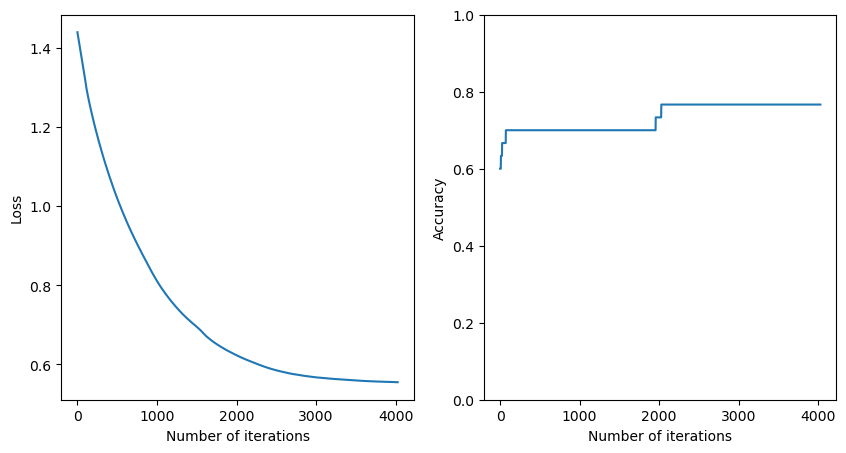

0.7666666666666667

In [25]:

nn_model = MLPClassifier(alpha=4, hidden_layer_sizes=(16, 32, 8, 4),
              learning_rate_init=0.0001, max_iter=100000, n_iter_no_change=2000,
              random_state=0, early_stopping=True)

nn_model.fit(data, labels)

score = nn_model.score(data, labels)
print("Training: accuracy %0.4f" % (score))
score = nn_model.score(test_data, test_labels)
print("Testing: accuracy: %0.4f\n" % (score))



fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].plot(nn_model.loss_curve_)
ax[0].set_xlabel('Number of iterations')
ax[0].set_ylabel('Loss')
plt.ylim(0,1)

ax[1].plot(nn_model.validation_scores_)
ax[1].set_xlabel('Number of iterations')
ax[1].set_ylabel('Accuracy')

plt.ylim(0,1)
plt.show()
nn_model.validation_scores_[-1]

In [7]:
nn_model = MLPClassifier(solver='adam', hidden_layer_sizes=(16,32,8,4), alpha=4, n_iter_no_change=2000, early_stopping=True, learning_rate_init=0.0001,random_state=0, max_iter=200000)
start = time.time()
nn_model.fit(data, labels)
stop = time.time()
print("Training Time: ", (stop-start))

Training Time:  6.5953638553619385


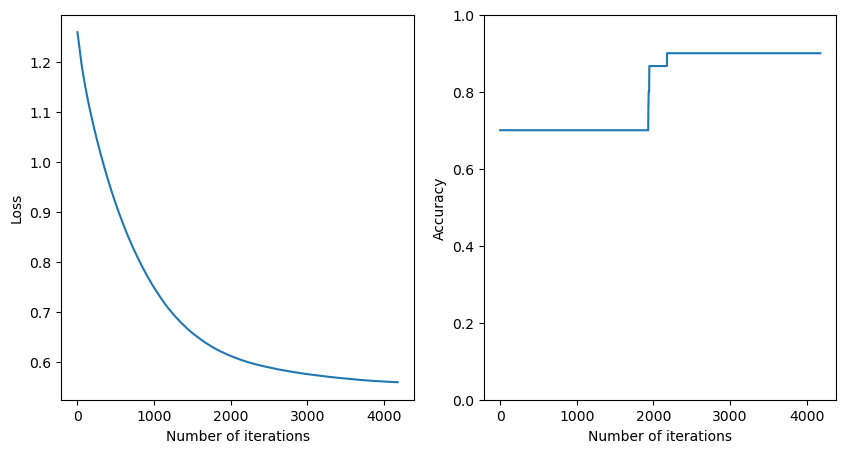

0.9

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].plot(nn_model.loss_curve_)
ax[0].set_xlabel('Number of iterations')
ax[0].set_ylabel('Loss')
plt.ylim(0,1)


ax[1].plot(nn_model.validation_scores_)
ax[1].set_xlabel('Number of iterations')
ax[1].set_ylabel('Accuracy')

plt.ylim(0,1)
plt.show()
nn_model.validation_scores_[-1]

In [26]:
n_init = 5
n_digits = 2

vanilla_KMeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=n_init, random_state=0).fit(data)
new_data = vanilla_KMeans.transform(data)
new_test_data = vanilla_KMeans.transform(test_data)


# kmeans + PCA
pca_KMeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=n_init, random_state=0).fit(pca_data)
new_pca_data = pca_KMeans.transform(pca_data)
new_pca_test_data = pca_KMeans.transform(pca_test_data)


# kmeans + ICA
ica_KMeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=n_init, random_state=0).fit(ica_data)
new_ica_data = ica_KMeans.transform(ica_data)
new_ica_test_data = ica_KMeans.transform(ica_test_data)


# kmeans + random projection
rp_KMeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=n_init, random_state=0).fit(rp_data)
new_rp_data = rp_KMeans.transform(rp_data)
new_rp_test_data = rp_KMeans.transform(rp_test_data)


# kmeans + LDA
lda_KMeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=n_init, random_state=0).fit(lda_data)
new_lda_data = lda_KMeans.transform(lda_data)
new_lda_test_data = lda_KMeans.transform(lda_test_data)


C:\Users\ZhangshiLiu\anaconda3\envs\a3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ZhangshiLiu\anaconda3\envs\a3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ZhangshiLiu\anaconda3\envs\a3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ZhangshiLiu\anaconda3\envs\a3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: User

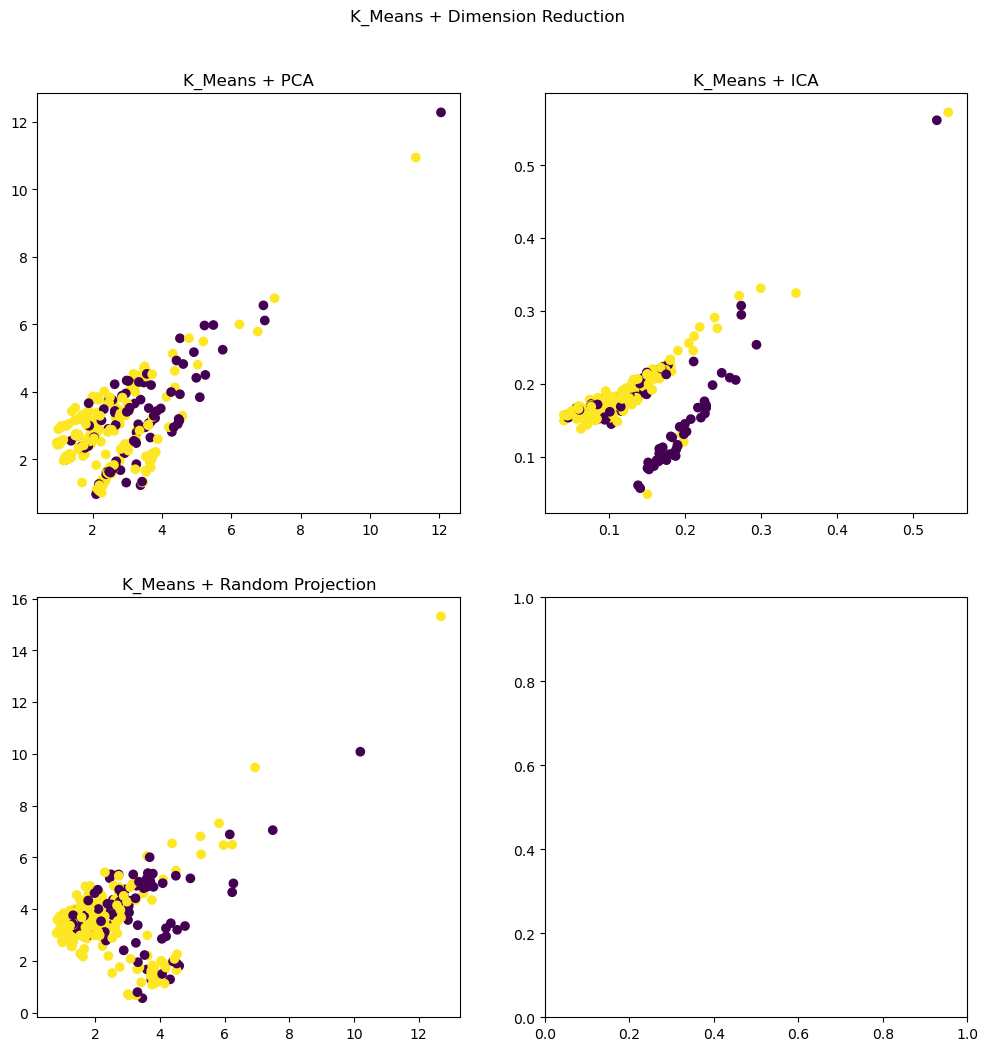

In [37]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

axs[0, 0].scatter(new_pca_data[:, 0], new_pca_data[:, 1], c=labels)
axs[0, 0].set_title("K_Means + PCA")

axs[0, 1].scatter(new_ica_data[:, 0], new_ica_data[:, 1], c=labels)
axs[0, 1].set_title("K_Means + ICA")

axs[1, 0].scatter(new_rp_data[:, 0], new_rp_data[:, 1], c=labels)
axs[1, 0].set_title("K_Means + Random Projection")

#axs[1, 1].scatter(lda_data[:, 0], lda_data[:, 1], c=labels)
#axs[1, 1].set_title("LDA")

plt.suptitle("K_Means + Dimension Reduction").set_y(0.95)
plt.show()

In [33]:
new_data = new_rp_data
new_test_data = new_rp_test_data

Training: accuracy 0.7987
Testing: accuracy: 0.7067



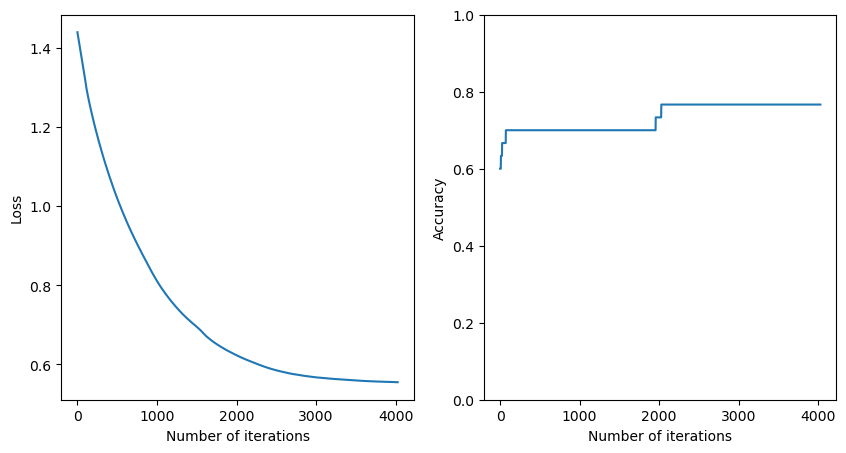

0.7666666666666667

In [34]:
nn_model = MLPClassifier(alpha=4, hidden_layer_sizes=(16, 32, 8, 4),
              learning_rate_init=0.0001, max_iter=100000, n_iter_no_change=2000,
              random_state=0, early_stopping=True)

nn_model.fit(data, labels)

score = nn_model.score(data, labels)
print("Training: accuracy %0.4f" % (score))
score = nn_model.score(test_data, test_labels)
print("Testing: accuracy: %0.4f\n" % (score))



fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].plot(nn_model.loss_curve_)
ax[0].set_xlabel('Number of iterations')
ax[0].set_ylabel('Loss')
plt.ylim(0,1)

ax[1].plot(nn_model.validation_scores_)
ax[1].set_xlabel('Number of iterations')
ax[1].set_ylabel('Accuracy')

plt.ylim(0,1)
plt.show()
nn_model.validation_scores_[-1]

Iteration 1, loss = 0.63529663
Iteration 2, loss = 0.63493072
Iteration 3, loss = 0.63462219
Iteration 4, loss = 0.63427591
Iteration 5, loss = 0.63404237
Iteration 6, loss = 0.63378190
Iteration 7, loss = 0.63349533
Iteration 8, loss = 0.63327058
Iteration 9, loss = 0.63305298
Iteration 10, loss = 0.63283319
Iteration 11, loss = 0.63261140
Iteration 12, loss = 0.63236389
Iteration 13, loss = 0.63214884
Iteration 14, loss = 0.63196884
Iteration 15, loss = 0.63176360
Iteration 16, loss = 0.63154558
Iteration 17, loss = 0.63136352
Iteration 18, loss = 0.63116788
Iteration 19, loss = 0.63096204
Iteration 20, loss = 0.63081422
Iteration 21, loss = 0.63063207
Iteration 22, loss = 0.63041871
Iteration 23, loss = 0.63025431
Iteration 24, loss = 0.63007697
Iteration 25, loss = 0.62990206
Iteration 26, loss = 0.62973018
Iteration 27, loss = 0.62957104
Iteration 28, loss = 0.62940921
Iteration 29, loss = 0.62923754
Iteration 30, loss = 0.62903049
Iteration 31, loss = 0.62891208
Iteration 32, los

Iteration 373, loss = 0.61708454
Iteration 374, loss = 0.61709287
Iteration 375, loss = 0.61707010
Iteration 376, loss = 0.61706104
Iteration 377, loss = 0.61706438
Iteration 378, loss = 0.61705541
Iteration 379, loss = 0.61706943
Iteration 380, loss = 0.61705560
Iteration 381, loss = 0.61704634
Iteration 382, loss = 0.61704557
Iteration 383, loss = 0.61704774
Iteration 384, loss = 0.61704054
Iteration 385, loss = 0.61702789
Iteration 386, loss = 0.61702124
Iteration 387, loss = 0.61702620
Iteration 388, loss = 0.61705814
Iteration 389, loss = 0.61705128
Iteration 390, loss = 0.61708314
Iteration 391, loss = 0.61709359
Iteration 392, loss = 0.61708338
Iteration 393, loss = 0.61707057
Iteration 394, loss = 0.61706300
Iteration 395, loss = 0.61705228
Iteration 396, loss = 0.61705607
Iteration 397, loss = 0.61703869
Iteration 398, loss = 0.61703427
Iteration 399, loss = 0.61702941
Iteration 400, loss = 0.61702869
Iteration 401, loss = 0.61702661
Iteration 402, loss = 0.61701666
Iteration 

Iteration 696, loss = 0.61668248
Iteration 697, loss = 0.61668091
Iteration 698, loss = 0.61668866
Iteration 699, loss = 0.61668747
Iteration 700, loss = 0.61667471
Iteration 701, loss = 0.61667396
Iteration 702, loss = 0.61668834
Iteration 703, loss = 0.61667404
Iteration 704, loss = 0.61667889
Iteration 705, loss = 0.61667339
Iteration 706, loss = 0.61668288
Iteration 707, loss = 0.61668173
Iteration 708, loss = 0.61667878
Iteration 709, loss = 0.61668438
Iteration 710, loss = 0.61667986
Iteration 711, loss = 0.61667749
Iteration 712, loss = 0.61667082
Iteration 713, loss = 0.61667669
Iteration 714, loss = 0.61667364
Iteration 715, loss = 0.61666479
Iteration 716, loss = 0.61666775
Iteration 717, loss = 0.61667681
Iteration 718, loss = 0.61666729
Iteration 719, loss = 0.61666784
Iteration 720, loss = 0.61666703
Iteration 721, loss = 0.61667092
Iteration 722, loss = 0.61667051
Iteration 723, loss = 0.61666672
Iteration 724, loss = 0.61666520
Iteration 725, loss = 0.61666584
Iteration 

Iteration 1040, loss = 0.61655334
Iteration 1041, loss = 0.61655023
Iteration 1042, loss = 0.61654931
Iteration 1043, loss = 0.61655066
Iteration 1044, loss = 0.61654894
Iteration 1045, loss = 0.61654598
Iteration 1046, loss = 0.61654607
Iteration 1047, loss = 0.61654476
Iteration 1048, loss = 0.61654394
Iteration 1049, loss = 0.61654270
Iteration 1050, loss = 0.61655094
Iteration 1051, loss = 0.61655333
Iteration 1052, loss = 0.61653617
Iteration 1053, loss = 0.61654136
Iteration 1054, loss = 0.61653867
Iteration 1055, loss = 0.61653344
Iteration 1056, loss = 0.61653812
Iteration 1057, loss = 0.61653882
Iteration 1058, loss = 0.61653525
Iteration 1059, loss = 0.61653636
Iteration 1060, loss = 0.61653194
Iteration 1061, loss = 0.61653531
Iteration 1062, loss = 0.61653318
Iteration 1063, loss = 0.61653243
Iteration 1064, loss = 0.61653655
Iteration 1065, loss = 0.61653262
Iteration 1066, loss = 0.61653750
Iteration 1067, loss = 0.61653598
Iteration 1068, loss = 0.61653547
Iteration 1069

Iteration 1397, loss = 0.61648366
Iteration 1398, loss = 0.61648289
Iteration 1399, loss = 0.61648166
Iteration 1400, loss = 0.61647608
Iteration 1401, loss = 0.61648720
Iteration 1402, loss = 0.61648086
Iteration 1403, loss = 0.61647444
Iteration 1404, loss = 0.61648676
Iteration 1405, loss = 0.61647650
Iteration 1406, loss = 0.61648415
Iteration 1407, loss = 0.61649063
Iteration 1408, loss = 0.61650592
Iteration 1409, loss = 0.61649867
Iteration 1410, loss = 0.61650171
Iteration 1411, loss = 0.61649994
Iteration 1412, loss = 0.61649968
Iteration 1413, loss = 0.61649997
Iteration 1414, loss = 0.61649997
Iteration 1415, loss = 0.61650003
Iteration 1416, loss = 0.61649919
Iteration 1417, loss = 0.61649985
Iteration 1418, loss = 0.61650283
Iteration 1419, loss = 0.61650118
Iteration 1420, loss = 0.61650378
Iteration 1421, loss = 0.61650481
Iteration 1422, loss = 0.61650507
Iteration 1423, loss = 0.61650630
Iteration 1424, loss = 0.61650627
Iteration 1425, loss = 0.61650559
Iteration 1426

Iteration 1761, loss = 0.61646386
Iteration 1762, loss = 0.61646746
Iteration 1763, loss = 0.61646524
Iteration 1764, loss = 0.61646897
Iteration 1765, loss = 0.61647471
Iteration 1766, loss = 0.61646988
Iteration 1767, loss = 0.61646900
Iteration 1768, loss = 0.61646979
Iteration 1769, loss = 0.61646777
Iteration 1770, loss = 0.61647196
Iteration 1771, loss = 0.61646759
Iteration 1772, loss = 0.61646728
Iteration 1773, loss = 0.61647284
Iteration 1774, loss = 0.61646901
Iteration 1775, loss = 0.61646891
Iteration 1776, loss = 0.61646692
Iteration 1777, loss = 0.61648148
Iteration 1778, loss = 0.61647259
Iteration 1779, loss = 0.61647302
Iteration 1780, loss = 0.61647485
Iteration 1781, loss = 0.61647074
Iteration 1782, loss = 0.61646762
Iteration 1783, loss = 0.61646197
Iteration 1784, loss = 0.61646288
Iteration 1785, loss = 0.61646650
Iteration 1786, loss = 0.61647233
Iteration 1787, loss = 0.61646106
Iteration 1788, loss = 0.61646382
Iteration 1789, loss = 0.61646320
Iteration 1790

Iteration 2116, loss = 0.61646790
Iteration 2117, loss = 0.61645818
Iteration 2118, loss = 0.61645795
Training loss did not improve more than tol=0.000100 for 2000 consecutive epochs. Stopping.
Iteration 1, loss = 0.63532657
Iteration 2, loss = 0.63499154
Iteration 3, loss = 0.63465991
Iteration 4, loss = 0.63436554
Iteration 5, loss = 0.63409131
Iteration 6, loss = 0.63381254
Iteration 7, loss = 0.63355819
Iteration 8, loss = 0.63328824
Iteration 9, loss = 0.63305272
Iteration 10, loss = 0.63281468
Iteration 11, loss = 0.63259306
Iteration 12, loss = 0.63235721
Iteration 13, loss = 0.63215217
Iteration 14, loss = 0.63194797
Iteration 15, loss = 0.63176322
Iteration 16, loss = 0.63155451
Iteration 17, loss = 0.63136494
Iteration 18, loss = 0.63117744
Iteration 19, loss = 0.63099634
Iteration 20, loss = 0.63081741
Iteration 21, loss = 0.63062468
Iteration 22, loss = 0.63044657
Iteration 23, loss = 0.63027362
Iteration 24, loss = 0.63009948
Iteration 25, loss = 0.62991619
Iteration 26, l

Iteration 358, loss = 0.61704181
Iteration 359, loss = 0.61704374
Iteration 360, loss = 0.61704452
Iteration 361, loss = 0.61704821
Iteration 362, loss = 0.61705000
Iteration 363, loss = 0.61706953
Iteration 364, loss = 0.61705634
Iteration 365, loss = 0.61705522
Iteration 366, loss = 0.61703859
Iteration 367, loss = 0.61702876
Iteration 368, loss = 0.61703275
Iteration 369, loss = 0.61701757
Iteration 370, loss = 0.61702074
Iteration 371, loss = 0.61702030
Iteration 372, loss = 0.61702008
Iteration 373, loss = 0.61704304
Iteration 374, loss = 0.61704983
Iteration 375, loss = 0.61704402
Iteration 376, loss = 0.61704197
Iteration 377, loss = 0.61703675
Iteration 378, loss = 0.61703770
Iteration 379, loss = 0.61705176
Iteration 380, loss = 0.61704618
Iteration 381, loss = 0.61704678
Iteration 382, loss = 0.61704757
Iteration 383, loss = 0.61706352
Iteration 384, loss = 0.61703570
Iteration 385, loss = 0.61699574
Iteration 386, loss = 0.61700730
Iteration 387, loss = 0.61695639
Iteration 

Iteration 706, loss = 0.61658979
Iteration 707, loss = 0.61658305
Iteration 708, loss = 0.61658174
Iteration 709, loss = 0.61658214
Iteration 710, loss = 0.61658089
Iteration 711, loss = 0.61658133
Iteration 712, loss = 0.61657795
Iteration 713, loss = 0.61657987
Iteration 714, loss = 0.61657887
Iteration 715, loss = 0.61657736
Iteration 716, loss = 0.61657685
Iteration 717, loss = 0.61658111
Iteration 718, loss = 0.61657558
Iteration 719, loss = 0.61657443
Iteration 720, loss = 0.61658007
Iteration 721, loss = 0.61657549
Iteration 722, loss = 0.61657662
Iteration 723, loss = 0.61657484
Iteration 724, loss = 0.61657470
Iteration 725, loss = 0.61657421
Iteration 726, loss = 0.61657208
Iteration 727, loss = 0.61657493
Iteration 728, loss = 0.61657311
Iteration 729, loss = 0.61657490
Iteration 730, loss = 0.61657190
Iteration 731, loss = 0.61657483
Iteration 732, loss = 0.61657112
Iteration 733, loss = 0.61657048
Iteration 734, loss = 0.61657048
Iteration 735, loss = 0.61657041
Iteration 

Iteration 1039, loss = 0.61652767
Iteration 1040, loss = 0.61652721
Iteration 1041, loss = 0.61652389
Iteration 1042, loss = 0.61652076
Iteration 1043, loss = 0.61652673
Iteration 1044, loss = 0.61651775
Iteration 1045, loss = 0.61651665
Iteration 1046, loss = 0.61651589
Iteration 1047, loss = 0.61651420
Iteration 1048, loss = 0.61651422
Iteration 1049, loss = 0.61651625
Iteration 1050, loss = 0.61651121
Iteration 1051, loss = 0.61651443
Iteration 1052, loss = 0.61651086
Iteration 1053, loss = 0.61651009
Iteration 1054, loss = 0.61650737
Iteration 1055, loss = 0.61650525
Iteration 1056, loss = 0.61650547
Iteration 1057, loss = 0.61650588
Iteration 1058, loss = 0.61650550
Iteration 1059, loss = 0.61650895
Iteration 1060, loss = 0.61649927
Iteration 1061, loss = 0.61649733
Iteration 1062, loss = 0.61649828
Iteration 1063, loss = 0.61649762
Iteration 1064, loss = 0.61649329
Iteration 1065, loss = 0.61649379
Iteration 1066, loss = 0.61649199
Iteration 1067, loss = 0.61649027
Iteration 1068

Iteration 1368, loss = 0.61646850
Iteration 1369, loss = 0.61646705
Iteration 1370, loss = 0.61646726
Iteration 1371, loss = 0.61646704
Iteration 1372, loss = 0.61646932
Iteration 1373, loss = 0.61646606
Iteration 1374, loss = 0.61646622
Iteration 1375, loss = 0.61647033
Iteration 1376, loss = 0.61646532
Iteration 1377, loss = 0.61646686
Iteration 1378, loss = 0.61646772
Iteration 1379, loss = 0.61646706
Iteration 1380, loss = 0.61646677
Iteration 1381, loss = 0.61646693
Iteration 1382, loss = 0.61646705
Iteration 1383, loss = 0.61646844
Iteration 1384, loss = 0.61646691
Iteration 1385, loss = 0.61646876
Iteration 1386, loss = 0.61647258
Iteration 1387, loss = 0.61647157
Iteration 1388, loss = 0.61647413
Iteration 1389, loss = 0.61648169
Iteration 1390, loss = 0.61647712
Iteration 1391, loss = 0.61647592
Iteration 1392, loss = 0.61647825
Iteration 1393, loss = 0.61647501
Iteration 1394, loss = 0.61647657
Iteration 1395, loss = 0.61647659
Iteration 1396, loss = 0.61647973
Iteration 1397

Iteration 1718, loss = 0.61646219
Iteration 1719, loss = 0.61646155
Iteration 1720, loss = 0.61645791
Iteration 1721, loss = 0.61645977
Iteration 1722, loss = 0.61645797
Iteration 1723, loss = 0.61645669
Iteration 1724, loss = 0.61646219
Iteration 1725, loss = 0.61645845
Iteration 1726, loss = 0.61645923
Iteration 1727, loss = 0.61645892
Iteration 1728, loss = 0.61646034
Iteration 1729, loss = 0.61645807
Iteration 1730, loss = 0.61646429
Iteration 1731, loss = 0.61645819
Iteration 1732, loss = 0.61645891
Iteration 1733, loss = 0.61645819
Iteration 1734, loss = 0.61645894
Iteration 1735, loss = 0.61645801
Iteration 1736, loss = 0.61645816
Iteration 1737, loss = 0.61646018
Iteration 1738, loss = 0.61645804
Iteration 1739, loss = 0.61645619
Iteration 1740, loss = 0.61646182
Iteration 1741, loss = 0.61645939
Iteration 1742, loss = 0.61645756
Iteration 1743, loss = 0.61645732
Iteration 1744, loss = 0.61645821
Iteration 1745, loss = 0.61645774
Iteration 1746, loss = 0.61645748
Iteration 1747

Iteration 2054, loss = 0.61646817
Iteration 2055, loss = 0.61646866
Iteration 2056, loss = 0.61646847
Iteration 2057, loss = 0.61648106
Iteration 2058, loss = 0.61647259
Iteration 2059, loss = 0.61647298
Iteration 2060, loss = 0.61647350
Iteration 2061, loss = 0.61647235
Iteration 2062, loss = 0.61647296
Iteration 2063, loss = 0.61646858
Iteration 2064, loss = 0.61647183
Iteration 2065, loss = 0.61646789
Iteration 2066, loss = 0.61646984
Iteration 2067, loss = 0.61646568
Iteration 2068, loss = 0.61646620
Iteration 2069, loss = 0.61646758
Iteration 2070, loss = 0.61647006
Iteration 2071, loss = 0.61646906
Iteration 2072, loss = 0.61646822
Iteration 2073, loss = 0.61646933
Iteration 2074, loss = 0.61646759
Iteration 2075, loss = 0.61646712
Iteration 2076, loss = 0.61646526
Iteration 2077, loss = 0.61646510
Iteration 2078, loss = 0.61646382
Iteration 2079, loss = 0.61646542
Iteration 2080, loss = 0.61646361
Iteration 2081, loss = 0.61646220
Iteration 2082, loss = 0.61646147
Training loss 

Iteration 286, loss = 0.61212068
Iteration 287, loss = 0.61205559
Iteration 288, loss = 0.61213766
Iteration 289, loss = 0.61202534
Iteration 290, loss = 0.61196094
Iteration 291, loss = 0.61186127
Iteration 292, loss = 0.61183397
Iteration 293, loss = 0.61179575
Iteration 294, loss = 0.61174772
Iteration 295, loss = 0.61173609
Iteration 296, loss = 0.61167315
Iteration 297, loss = 0.61160646
Iteration 298, loss = 0.61153277
Iteration 299, loss = 0.61145274
Iteration 300, loss = 0.61136905
Iteration 301, loss = 0.61128312
Iteration 302, loss = 0.61116582
Iteration 303, loss = 0.61106534
Iteration 304, loss = 0.61092518
Iteration 305, loss = 0.61081077
Iteration 306, loss = 0.61081616
Iteration 307, loss = 0.61087442
Iteration 308, loss = 0.61068745
Iteration 309, loss = 0.61042140
Iteration 310, loss = 0.61035036
Iteration 311, loss = 0.61031044
Iteration 312, loss = 0.61025018
Iteration 313, loss = 0.61016080
Iteration 314, loss = 0.61006710
Iteration 315, loss = 0.60998535
Iteration 

Iteration 646, loss = 0.49360265
Iteration 647, loss = 0.49372766
Iteration 648, loss = 0.49194070
Iteration 649, loss = 0.49090015
Iteration 650, loss = 0.49118377
Iteration 651, loss = 0.49313616
Iteration 652, loss = 0.49649757
Iteration 653, loss = 0.49548763
Iteration 654, loss = 0.49200872
Iteration 655, loss = 0.49111372
Iteration 656, loss = 0.49094771
Iteration 657, loss = 0.49205094
Iteration 658, loss = 0.49177423
Iteration 659, loss = 0.49045195
Iteration 660, loss = 0.48972351
Iteration 661, loss = 0.48938505
Iteration 662, loss = 0.48921378
Iteration 663, loss = 0.48991195
Iteration 664, loss = 0.48952878
Iteration 665, loss = 0.48875155
Iteration 666, loss = 0.48817496
Iteration 667, loss = 0.49069326
Iteration 668, loss = 0.49038928
Iteration 669, loss = 0.48900724
Iteration 670, loss = 0.48745916
Iteration 671, loss = 0.48749146
Iteration 672, loss = 0.49000143
Iteration 673, loss = 0.49006323
Iteration 674, loss = 0.48848329
Iteration 675, loss = 0.48720597
Iteration 

Iteration 991, loss = 0.48018522
Iteration 992, loss = 0.48013809
Iteration 993, loss = 0.47827341
Iteration 994, loss = 0.47895430
Iteration 995, loss = 0.47908041
Iteration 996, loss = 0.47920264
Iteration 997, loss = 0.47931540
Iteration 998, loss = 0.47939423
Iteration 999, loss = 0.47927051
Iteration 1000, loss = 0.47865124
Iteration 1001, loss = 0.47834953
Iteration 1002, loss = 0.47863793
Iteration 1003, loss = 0.47946675
Iteration 1004, loss = 0.47963603
Iteration 1005, loss = 0.47916549
Iteration 1006, loss = 0.47867936
Iteration 1007, loss = 0.47835542
Iteration 1008, loss = 0.47830262
Iteration 1009, loss = 0.47833782
Iteration 1010, loss = 0.47839269
Iteration 1011, loss = 0.47842712
Iteration 1012, loss = 0.47848021
Iteration 1013, loss = 0.47852326
Iteration 1014, loss = 0.47837871
Iteration 1015, loss = 0.47822778
Iteration 1016, loss = 0.47839508
Iteration 1017, loss = 0.47899839
Iteration 1018, loss = 0.47982770
Iteration 1019, loss = 0.48040580
Iteration 1020, loss = 

Iteration 1341, loss = 0.47943530
Iteration 1342, loss = 0.47902117
Iteration 1343, loss = 0.47793543
Iteration 1344, loss = 0.47705468
Iteration 1345, loss = 0.47836673
Iteration 1346, loss = 0.47919645
Iteration 1347, loss = 0.47915784
Iteration 1348, loss = 0.47827215
Iteration 1349, loss = 0.47749786
Iteration 1350, loss = 0.47765604
Iteration 1351, loss = 0.47798332
Iteration 1352, loss = 0.47847906
Iteration 1353, loss = 0.47793483
Iteration 1354, loss = 0.47765233
Iteration 1355, loss = 0.47766551
Iteration 1356, loss = 0.47811220
Iteration 1357, loss = 0.47761122
Iteration 1358, loss = 0.47729278
Iteration 1359, loss = 0.47768027
Iteration 1360, loss = 0.47772593
Iteration 1361, loss = 0.47762601
Iteration 1362, loss = 0.47740455
Iteration 1363, loss = 0.47740004
Iteration 1364, loss = 0.47726804
Iteration 1365, loss = 0.47738256
Iteration 1366, loss = 0.47743427
Iteration 1367, loss = 0.47731859
Iteration 1368, loss = 0.47801523
Iteration 1369, loss = 0.47828554
Iteration 1370

Iteration 1675, loss = 0.47755545
Iteration 1676, loss = 0.47686880
Iteration 1677, loss = 0.47693162
Iteration 1678, loss = 0.47695257
Iteration 1679, loss = 0.47674932
Iteration 1680, loss = 0.47681374
Iteration 1681, loss = 0.47731401
Iteration 1682, loss = 0.47773764
Iteration 1683, loss = 0.47721220
Iteration 1684, loss = 0.47717480
Iteration 1685, loss = 0.47684387
Iteration 1686, loss = 0.47697252
Iteration 1687, loss = 0.47714499
Iteration 1688, loss = 0.47759268
Iteration 1689, loss = 0.47939002
Iteration 1690, loss = 0.48041033
Iteration 1691, loss = 0.47883353
Iteration 1692, loss = 0.47870747
Iteration 1693, loss = 0.47746050
Iteration 1694, loss = 0.47704197
Iteration 1695, loss = 0.47693882
Iteration 1696, loss = 0.47711484
Iteration 1697, loss = 0.47736584
Iteration 1698, loss = 0.47727691
Iteration 1699, loss = 0.47707769
Iteration 1700, loss = 0.47687373
Iteration 1701, loss = 0.47698691
Iteration 1702, loss = 0.47694923
Iteration 1703, loss = 0.47691662
Iteration 1704

Iteration 2025, loss = 0.47663882
Iteration 2026, loss = 0.47717898
Iteration 2027, loss = 0.47838821
Iteration 2028, loss = 0.47941592
Iteration 2029, loss = 0.47852891
Iteration 2030, loss = 0.47689949
Iteration 2031, loss = 0.47651818
Iteration 2032, loss = 0.47635035
Iteration 2033, loss = 0.47646987
Iteration 2034, loss = 0.47661269
Iteration 2035, loss = 0.47679125
Iteration 2036, loss = 0.47698429
Iteration 2037, loss = 0.47672894
Iteration 2038, loss = 0.47684175
Iteration 2039, loss = 0.47627415
Iteration 2040, loss = 0.47639084
Iteration 2041, loss = 0.47618215
Iteration 2042, loss = 0.47631899
Iteration 2043, loss = 0.47683074
Iteration 2044, loss = 0.47653968
Iteration 2045, loss = 0.47659089
Iteration 2046, loss = 0.47632398
Iteration 2047, loss = 0.47692993
Iteration 2048, loss = 0.47724197
Iteration 2049, loss = 0.47709237
Iteration 2050, loss = 0.47656680
Iteration 2051, loss = 0.47628150
Iteration 2052, loss = 0.47640563
Iteration 2053, loss = 0.47663886
Iteration 2054

Iteration 2374, loss = 0.47660025
Iteration 2375, loss = 0.47614568
Iteration 2376, loss = 0.47634878
Iteration 2377, loss = 0.47691782
Iteration 2378, loss = 0.47679553
Iteration 2379, loss = 0.47604091
Iteration 2380, loss = 0.47579281
Iteration 2381, loss = 0.47623461
Iteration 2382, loss = 0.47764683
Iteration 2383, loss = 0.47718892
Iteration 2384, loss = 0.47641997
Iteration 2385, loss = 0.47589037
Iteration 2386, loss = 0.47617606
Iteration 2387, loss = 0.47722693
Iteration 2388, loss = 0.47867476
Iteration 2389, loss = 0.47831755
Iteration 2390, loss = 0.47696800
Iteration 2391, loss = 0.47636491
Iteration 2392, loss = 0.47575739
Iteration 2393, loss = 0.47686521
Iteration 2394, loss = 0.47616423
Iteration 2395, loss = 0.47541598
Iteration 2396, loss = 0.47653097
Iteration 2397, loss = 0.47726365
Iteration 2398, loss = 0.47801528
Iteration 2399, loss = 0.47770926
Iteration 2400, loss = 0.47683308
Iteration 2401, loss = 0.47601173
Iteration 2402, loss = 0.47575951
Iteration 2403

Iteration 2732, loss = 0.47761680
Iteration 2733, loss = 0.47688743
Iteration 2734, loss = 0.47615966
Iteration 2735, loss = 0.47560253
Iteration 2736, loss = 0.47550132
Iteration 2737, loss = 0.47593475
Iteration 2738, loss = 0.47598693
Iteration 2739, loss = 0.47586511
Iteration 2740, loss = 0.47604321
Iteration 2741, loss = 0.47587290
Iteration 2742, loss = 0.47568185
Iteration 2743, loss = 0.47577002
Iteration 2744, loss = 0.47589557
Iteration 2745, loss = 0.47644680
Iteration 2746, loss = 0.47688211
Iteration 2747, loss = 0.47719131
Iteration 2748, loss = 0.47736286
Iteration 2749, loss = 0.47688099
Iteration 2750, loss = 0.47626443
Iteration 2751, loss = 0.47573779
Iteration 2752, loss = 0.47558994
Iteration 2753, loss = 0.47557482
Iteration 2754, loss = 0.47558569
Iteration 2755, loss = 0.47533268
Iteration 2756, loss = 0.47621381
Iteration 2757, loss = 0.47608874
Iteration 2758, loss = 0.47598894
Iteration 2759, loss = 0.47593045
Iteration 2760, loss = 0.47593805
Iteration 2761

Iteration 3076, loss = 0.47758836
Iteration 3077, loss = 0.47881506
Iteration 3078, loss = 0.47897386
Iteration 3079, loss = 0.47829989
Iteration 3080, loss = 0.47691498
Iteration 3081, loss = 0.47560491
Iteration 3082, loss = 0.47520152
Iteration 3083, loss = 0.47498195
Iteration 3084, loss = 0.47517551
Iteration 3085, loss = 0.47655497
Iteration 3086, loss = 0.47726986
Iteration 3087, loss = 0.47692519
Iteration 3088, loss = 0.47644656
Iteration 3089, loss = 0.47556531
Iteration 3090, loss = 0.47539243
Iteration 3091, loss = 0.47533283
Iteration 3092, loss = 0.47502727
Iteration 3093, loss = 0.47499755
Iteration 3094, loss = 0.47500181
Iteration 3095, loss = 0.47501521
Iteration 3096, loss = 0.47504090
Iteration 3097, loss = 0.47501441
Iteration 3098, loss = 0.47528253
Iteration 3099, loss = 0.47493479
Iteration 3100, loss = 0.47527362
Iteration 3101, loss = 0.47524775
Iteration 3102, loss = 0.47519830
Iteration 3103, loss = 0.47512639
Iteration 3104, loss = 0.47498063
Iteration 3105

Iteration 3405, loss = 0.47822210
Iteration 3406, loss = 0.47771020
Iteration 3407, loss = 0.47628723
Iteration 3408, loss = 0.47527436
Iteration 3409, loss = 0.47497141
Iteration 3410, loss = 0.47562235
Iteration 3411, loss = 0.47630039
Iteration 3412, loss = 0.47701806
Iteration 3413, loss = 0.47807423
Iteration 3414, loss = 0.47919824
Iteration 3415, loss = 0.47882215
Iteration 3416, loss = 0.47734296
Iteration 3417, loss = 0.47533946
Iteration 3418, loss = 0.47472260
Iteration 3419, loss = 0.47611412
Iteration 3420, loss = 0.47621357
Iteration 3421, loss = 0.47613628
Iteration 3422, loss = 0.47614883
Iteration 3423, loss = 0.47563354
Iteration 3424, loss = 0.47559769
Iteration 3425, loss = 0.47539536
Iteration 3426, loss = 0.47512517
Iteration 3427, loss = 0.47512423
Iteration 3428, loss = 0.47529428
Iteration 3429, loss = 0.47517734
Iteration 3430, loss = 0.47500411
Iteration 3431, loss = 0.47485767
Iteration 3432, loss = 0.47534435
Iteration 3433, loss = 0.47508274
Iteration 3434

Iteration 3741, loss = 0.47749347
Iteration 3742, loss = 0.47934795
Iteration 3743, loss = 0.47871561
Iteration 3744, loss = 0.47627684
Iteration 3745, loss = 0.47541189
Iteration 3746, loss = 0.47444753
Iteration 3747, loss = 0.47475915
Iteration 3748, loss = 0.47513019
Iteration 3749, loss = 0.47547493
Iteration 3750, loss = 0.47484835
Iteration 3751, loss = 0.47449280
Iteration 3752, loss = 0.47482134
Iteration 3753, loss = 0.47556366
Iteration 3754, loss = 0.47543157
Iteration 3755, loss = 0.47474538
Iteration 3756, loss = 0.47476291
Iteration 3757, loss = 0.47522469
Iteration 3758, loss = 0.47492015
Iteration 3759, loss = 0.47478950
Iteration 3760, loss = 0.47455694
Iteration 3761, loss = 0.47487227
Iteration 3762, loss = 0.47501003
Iteration 3763, loss = 0.47496141
Iteration 3764, loss = 0.47471481
Iteration 3765, loss = 0.47417653
Iteration 3766, loss = 0.47498450
Iteration 3767, loss = 0.47567060
Iteration 3768, loss = 0.47583179
Iteration 3769, loss = 0.47540153
Iteration 3770

Iteration 4084, loss = 0.47446601
Iteration 4085, loss = 0.47444642
Iteration 4086, loss = 0.47449359
Iteration 4087, loss = 0.47437614
Iteration 4088, loss = 0.47451462
Iteration 4089, loss = 0.47471690
Iteration 4090, loss = 0.47490430
Iteration 4091, loss = 0.47416624
Iteration 4092, loss = 0.47477883
Iteration 4093, loss = 0.47598078
Iteration 4094, loss = 0.47564500
Iteration 4095, loss = 0.47479921
Iteration 4096, loss = 0.47442954
Iteration 4097, loss = 0.47500718
Iteration 4098, loss = 0.47682372
Iteration 4099, loss = 0.47942998
Iteration 4100, loss = 0.47787856
Iteration 4101, loss = 0.47520721
Iteration 4102, loss = 0.47398502
Iteration 4103, loss = 0.47646440
Iteration 4104, loss = 0.47734578
Iteration 4105, loss = 0.47737360
Iteration 4106, loss = 0.47629548
Iteration 4107, loss = 0.47460622
Iteration 4108, loss = 0.47464302
Iteration 4109, loss = 0.47522938
Iteration 4110, loss = 0.47558150
Iteration 4111, loss = 0.47548844
Iteration 4112, loss = 0.47512154
Iteration 4113

Iteration 4427, loss = 0.47463924
Iteration 4428, loss = 0.47443116
Iteration 4429, loss = 0.47424170
Iteration 4430, loss = 0.47491502
Iteration 4431, loss = 0.47425751
Iteration 4432, loss = 0.47415561
Iteration 4433, loss = 0.47431323
Iteration 4434, loss = 0.47560632
Iteration 4435, loss = 0.47651557
Iteration 4436, loss = 0.47617453
Iteration 4437, loss = 0.47506862
Iteration 4438, loss = 0.47446959
Iteration 4439, loss = 0.47425400
Iteration 4440, loss = 0.47405146
Iteration 4441, loss = 0.47411951
Iteration 4442, loss = 0.47414633
Iteration 4443, loss = 0.47410836
Iteration 4444, loss = 0.47407819
Iteration 4445, loss = 0.47406573
Iteration 4446, loss = 0.47409281
Iteration 4447, loss = 0.47412685
Iteration 4448, loss = 0.47395967
Iteration 4449, loss = 0.47408524
Iteration 4450, loss = 0.47459464
Iteration 4451, loss = 0.47706377
Iteration 4452, loss = 0.47798832
Iteration 4453, loss = 0.47744313
Iteration 4454, loss = 0.47536074
Iteration 4455, loss = 0.47422264
Iteration 4456

Iteration 4757, loss = 0.47423245
Iteration 4758, loss = 0.47380298
Iteration 4759, loss = 0.47487289
Iteration 4760, loss = 0.47578878
Iteration 4761, loss = 0.47595583
Iteration 4762, loss = 0.47550760
Iteration 4763, loss = 0.47524115
Iteration 4764, loss = 0.47491690
Iteration 4765, loss = 0.47537380
Iteration 4766, loss = 0.47525848
Iteration 4767, loss = 0.47474735
Iteration 4768, loss = 0.47431933
Iteration 4769, loss = 0.47345405
Iteration 4770, loss = 0.47427446
Iteration 4771, loss = 0.47507688
Iteration 4772, loss = 0.47697745
Iteration 4773, loss = 0.47645368
Iteration 4774, loss = 0.47518764
Iteration 4775, loss = 0.47416602
Iteration 4776, loss = 0.47421270
Iteration 4777, loss = 0.47427701
Iteration 4778, loss = 0.47424485
Iteration 4779, loss = 0.47404180
Iteration 4780, loss = 0.47376991
Iteration 4781, loss = 0.47389284
Iteration 4782, loss = 0.47422169
Iteration 4783, loss = 0.47465006
Iteration 4784, loss = 0.47512902
Iteration 4785, loss = 0.47602487
Iteration 4786

Iteration 5115, loss = 0.47774529
Iteration 5116, loss = 0.47890465
Iteration 5117, loss = 0.47783360
Iteration 5118, loss = 0.47609286
Iteration 5119, loss = 0.47406488
Iteration 5120, loss = 0.47483967
Iteration 5121, loss = 0.47396928
Iteration 5122, loss = 0.47397705
Iteration 5123, loss = 0.47335240
Iteration 5124, loss = 0.47367514
Iteration 5125, loss = 0.47526055
Iteration 5126, loss = 0.47599616
Iteration 5127, loss = 0.47571190
Iteration 5128, loss = 0.47442074
Iteration 5129, loss = 0.47409068
Iteration 5130, loss = 0.47375860
Iteration 5131, loss = 0.47379142
Iteration 5132, loss = 0.47359368
Iteration 5133, loss = 0.47436427
Iteration 5134, loss = 0.47405364
Iteration 5135, loss = 0.47357422
Iteration 5136, loss = 0.47372627
Iteration 5137, loss = 0.47383116
Iteration 5138, loss = 0.47368639
Iteration 5139, loss = 0.47396930
Iteration 5140, loss = 0.47385077
Iteration 5141, loss = 0.47367252
Iteration 5142, loss = 0.47357572
Iteration 5143, loss = 0.47356966
Iteration 5144

Iteration 5467, loss = 0.47372752
Iteration 5468, loss = 0.47334265
Iteration 5469, loss = 0.47398352
Iteration 5470, loss = 0.47433455
Iteration 5471, loss = 0.47439536
Iteration 5472, loss = 0.47388673
Iteration 5473, loss = 0.47415617
Iteration 5474, loss = 0.47408288
Iteration 5475, loss = 0.47372531
Iteration 5476, loss = 0.47322105
Iteration 5477, loss = 0.47385679
Iteration 5478, loss = 0.47438136
Iteration 5479, loss = 0.47515728
Iteration 5480, loss = 0.47515995
Iteration 5481, loss = 0.47442112
Iteration 5482, loss = 0.47433302
Iteration 5483, loss = 0.47372076
Iteration 5484, loss = 0.47350595
Iteration 5485, loss = 0.47351315
Iteration 5486, loss = 0.47346048
Iteration 5487, loss = 0.47344190
Iteration 5488, loss = 0.47356685
Iteration 5489, loss = 0.47371698
Iteration 5490, loss = 0.47353603
Iteration 5491, loss = 0.47365924
Iteration 5492, loss = 0.47377854
Iteration 5493, loss = 0.47389160
Iteration 5494, loss = 0.47379699
Iteration 5495, loss = 0.47365835
Iteration 5496

Iteration 5808, loss = 0.47538077
Iteration 5809, loss = 0.47453225
Iteration 5810, loss = 0.47440183
Iteration 5811, loss = 0.47568170
Iteration 5812, loss = 0.47690411
Iteration 5813, loss = 0.47740391
Iteration 5814, loss = 0.47693902
Iteration 5815, loss = 0.47640647
Iteration 5816, loss = 0.47487325
Iteration 5817, loss = 0.47484972
Iteration 5818, loss = 0.47375439
Iteration 5819, loss = 0.47364871
Iteration 5820, loss = 0.47404855
Iteration 5821, loss = 0.47383937
Iteration 5822, loss = 0.47379581
Iteration 5823, loss = 0.47399733
Iteration 5824, loss = 0.47439850
Iteration 5825, loss = 0.47579051
Iteration 5826, loss = 0.47717854
Iteration 5827, loss = 0.47689118
Iteration 5828, loss = 0.47587720
Iteration 5829, loss = 0.47461206
Iteration 5830, loss = 0.47413028
Iteration 5831, loss = 0.47409299
Iteration 5832, loss = 0.47379474
Iteration 5833, loss = 0.47382344
Iteration 5834, loss = 0.47388428
Iteration 5835, loss = 0.47376103
Iteration 5836, loss = 0.47344669
Iteration 5837

Iteration 6154, loss = 0.47348988
Iteration 6155, loss = 0.47350017
Iteration 6156, loss = 0.47339677
Iteration 6157, loss = 0.47326200
Iteration 6158, loss = 0.47317022
Iteration 6159, loss = 0.47323519
Iteration 6160, loss = 0.47374566
Iteration 6161, loss = 0.47453911
Iteration 6162, loss = 0.47502756
Iteration 6163, loss = 0.47425430
Iteration 6164, loss = 0.47347847
Iteration 6165, loss = 0.47321800
Iteration 6166, loss = 0.47333688
Iteration 6167, loss = 0.47379620
Iteration 6168, loss = 0.47513531
Iteration 6169, loss = 0.47604757
Iteration 6170, loss = 0.47545876
Iteration 6171, loss = 0.47466829
Iteration 6172, loss = 0.47386641
Iteration 6173, loss = 0.47338973
Iteration 6174, loss = 0.47332972
Iteration 6175, loss = 0.47333047
Iteration 6176, loss = 0.47334479
Iteration 6177, loss = 0.47332057
Iteration 6178, loss = 0.47332243
Iteration 6179, loss = 0.47358493
Iteration 6180, loss = 0.47328693
Iteration 6181, loss = 0.47311223
Iteration 6182, loss = 0.47322618
Iteration 6183

Iteration 6482, loss = 0.47369062
Iteration 6483, loss = 0.47364426
Iteration 6484, loss = 0.47387506
Iteration 6485, loss = 0.47403415
Iteration 6486, loss = 0.47381399
Iteration 6487, loss = 0.47427993
Iteration 6488, loss = 0.47405445
Iteration 6489, loss = 0.47344021
Iteration 6490, loss = 0.47385958
Iteration 6491, loss = 0.47324109
Iteration 6492, loss = 0.47318844
Iteration 6493, loss = 0.47311238
Iteration 6494, loss = 0.47308241
Iteration 6495, loss = 0.47384942
Iteration 6496, loss = 0.47452775
Iteration 6497, loss = 0.47478494
Iteration 6498, loss = 0.47460202
Iteration 6499, loss = 0.47455845
Iteration 6500, loss = 0.47415003
Iteration 6501, loss = 0.47311551
Iteration 6502, loss = 0.47294051
Iteration 6503, loss = 0.47351286
Iteration 6504, loss = 0.47505899
Iteration 6505, loss = 0.47726862
Iteration 6506, loss = 0.47724910
Iteration 6507, loss = 0.47574422
Iteration 6508, loss = 0.47411271
Iteration 6509, loss = 0.47318077
Iteration 6510, loss = 0.47419656
Iteration 6511

Iteration 6838, loss = 0.47423053
Iteration 6839, loss = 0.47452851
Iteration 6840, loss = 0.47441720
Iteration 6841, loss = 0.47423994
Iteration 6842, loss = 0.47364058
Iteration 6843, loss = 0.47336216
Iteration 6844, loss = 0.47408993
Iteration 6845, loss = 0.47376137
Iteration 6846, loss = 0.47337225
Iteration 6847, loss = 0.47380587
Iteration 6848, loss = 0.47424111
Iteration 6849, loss = 0.47437164
Iteration 6850, loss = 0.47364226
Iteration 6851, loss = 0.47338948
Iteration 6852, loss = 0.47404170
Iteration 6853, loss = 0.47396160
Iteration 6854, loss = 0.47348791
Iteration 6855, loss = 0.47264161
Iteration 6856, loss = 0.47416130
Iteration 6857, loss = 0.47551436
Iteration 6858, loss = 0.47745933
Iteration 6859, loss = 0.48030240
Iteration 6860, loss = 0.48155391
Iteration 6861, loss = 0.47981207
Iteration 6862, loss = 0.47626608
Iteration 6863, loss = 0.47413284
Iteration 6864, loss = 0.47330500
Iteration 6865, loss = 0.47385646
Iteration 6866, loss = 0.47502568
Iteration 6867

Iteration 7199, loss = 0.47578342
Iteration 7200, loss = 0.47436231
Iteration 7201, loss = 0.47375866
Iteration 7202, loss = 0.47363036
Iteration 7203, loss = 0.47312650
Iteration 7204, loss = 0.47311022
Iteration 7205, loss = 0.47303319
Iteration 7206, loss = 0.47303790
Iteration 7207, loss = 0.47309616
Iteration 7208, loss = 0.47307479
Iteration 7209, loss = 0.47302298
Iteration 7210, loss = 0.47302474
Iteration 7211, loss = 0.47322684
Iteration 7212, loss = 0.47344306
Iteration 7213, loss = 0.47399256
Iteration 7214, loss = 0.47376926
Iteration 7215, loss = 0.47329883
Iteration 7216, loss = 0.47335922
Iteration 7217, loss = 0.47357318
Iteration 7218, loss = 0.47401566
Iteration 7219, loss = 0.47408542
Iteration 7220, loss = 0.47375661
Iteration 7221, loss = 0.47351355
Iteration 7222, loss = 0.47278697
Iteration 7223, loss = 0.47376422
Iteration 7224, loss = 0.47370124
Iteration 7225, loss = 0.47428861
Iteration 7226, loss = 0.47446672
Iteration 7227, loss = 0.47417486
Iteration 7228

Iteration 7540, loss = 0.47368810
Iteration 7541, loss = 0.47356213
Iteration 7542, loss = 0.47326102
Iteration 7543, loss = 0.47351872
Iteration 7544, loss = 0.47333400
Iteration 7545, loss = 0.47326833
Iteration 7546, loss = 0.47376332
Iteration 7547, loss = 0.47383026
Iteration 7548, loss = 0.47368720
Iteration 7549, loss = 0.47322233
Iteration 7550, loss = 0.47319292
Iteration 7551, loss = 0.47375167
Iteration 7552, loss = 0.47395269
Iteration 7553, loss = 0.47332282
Iteration 7554, loss = 0.47266895
Iteration 7555, loss = 0.47379152
Iteration 7556, loss = 0.47477470
Iteration 7557, loss = 0.47347891
Iteration 7558, loss = 0.47347725
Iteration 7559, loss = 0.47383911
Iteration 7560, loss = 0.47382908
Iteration 7561, loss = 0.47364431
Iteration 7562, loss = 0.47317160
Iteration 7563, loss = 0.47302956
Iteration 7564, loss = 0.47286287
Iteration 7565, loss = 0.47279658
Iteration 7566, loss = 0.47297579
Iteration 7567, loss = 0.47369820
Iteration 7568, loss = 0.47447089
Iteration 7569

Iteration 7904, loss = 0.47288915
Iteration 7905, loss = 0.47320165
Iteration 7906, loss = 0.47279509
Iteration 7907, loss = 0.47293760
Iteration 7908, loss = 0.47318804
Iteration 7909, loss = 0.47318760
Iteration 7910, loss = 0.47301267
Iteration 7911, loss = 0.47284774
Iteration 7912, loss = 0.47284930
Iteration 7913, loss = 0.47261729
Iteration 7914, loss = 0.47393357
Iteration 7915, loss = 0.47607891
Iteration 7916, loss = 0.47506614
Iteration 7917, loss = 0.47370140
Iteration 7918, loss = 0.47287771
Iteration 7919, loss = 0.47340726
Iteration 7920, loss = 0.47379384
Iteration 7921, loss = 0.47384903
Iteration 7922, loss = 0.47380773
Iteration 7923, loss = 0.47356516
Iteration 7924, loss = 0.47324003
Iteration 7925, loss = 0.47312148
Iteration 7926, loss = 0.47273787
Iteration 7927, loss = 0.47269410
Iteration 7928, loss = 0.47293745
Iteration 7929, loss = 0.47323687
Iteration 7930, loss = 0.47320811
Iteration 7931, loss = 0.47295503
Iteration 7932, loss = 0.47277928
Iteration 7933

Iteration 8240, loss = 0.47377371
Iteration 8241, loss = 0.47439432
Iteration 8242, loss = 0.47475824
Iteration 8243, loss = 0.47481319
Iteration 8244, loss = 0.47452671
Iteration 8245, loss = 0.47446674
Iteration 8246, loss = 0.47393004
Iteration 8247, loss = 0.47306839
Iteration 8248, loss = 0.47267015
Iteration 8249, loss = 0.47292294
Iteration 8250, loss = 0.47303976
Iteration 8251, loss = 0.47333949
Iteration 8252, loss = 0.47358504
Iteration 8253, loss = 0.47341090
Iteration 8254, loss = 0.47350617
Iteration 8255, loss = 0.47322396
Iteration 8256, loss = 0.47278709
Iteration 8257, loss = 0.47248098
Iteration 8258, loss = 0.47302971
Iteration 8259, loss = 0.47349450
Iteration 8260, loss = 0.47411908
Iteration 8261, loss = 0.47444591
Iteration 8262, loss = 0.47365770
Iteration 8263, loss = 0.47237546
Iteration 8264, loss = 0.47266146
Iteration 8265, loss = 0.47512685
Iteration 8266, loss = 0.47512537
Iteration 8267, loss = 0.47434326
Iteration 8268, loss = 0.47304165
Iteration 8269

Iteration 8554, loss = 0.47244698
Iteration 8555, loss = 0.47276251
Iteration 8556, loss = 0.47275091
Iteration 8557, loss = 0.47258032
Iteration 8558, loss = 0.47335397
Iteration 8559, loss = 0.47254484
Iteration 8560, loss = 0.47242787
Iteration 8561, loss = 0.47276544
Iteration 8562, loss = 0.47302034
Iteration 8563, loss = 0.47339465
Iteration 8564, loss = 0.47337624
Iteration 8565, loss = 0.47283323
Iteration 8566, loss = 0.47325494
Iteration 8567, loss = 0.47248779
Iteration 8568, loss = 0.47244528
Iteration 8569, loss = 0.47247629
Iteration 8570, loss = 0.47250682
Iteration 8571, loss = 0.47256327
Iteration 8572, loss = 0.47272585
Iteration 8573, loss = 0.47342940
Iteration 8574, loss = 0.47408430
Iteration 8575, loss = 0.47415211
Iteration 8576, loss = 0.47329634
Iteration 8577, loss = 0.47236284
Iteration 8578, loss = 0.47320790
Iteration 8579, loss = 0.47349635
Iteration 8580, loss = 0.47350676
Iteration 8581, loss = 0.47284030
Iteration 8582, loss = 0.47264062
Iteration 8583

Iteration 8881, loss = 0.47246061
Iteration 8882, loss = 0.47261512
Iteration 8883, loss = 0.47270760
Iteration 8884, loss = 0.47282448
Iteration 8885, loss = 0.47279128
Iteration 8886, loss = 0.47245350
Iteration 8887, loss = 0.47226891
Iteration 8888, loss = 0.47231269
Iteration 8889, loss = 0.47292535
Iteration 8890, loss = 0.47382581
Iteration 8891, loss = 0.47451505
Iteration 8892, loss = 0.47457014
Iteration 8893, loss = 0.47390487
Iteration 8894, loss = 0.47279701
Iteration 8895, loss = 0.47166141
Iteration 8896, loss = 0.47351467
Iteration 8897, loss = 0.47701043
Iteration 8898, loss = 0.47985663
Iteration 8899, loss = 0.48030069
Iteration 8900, loss = 0.47804899
Iteration 8901, loss = 0.47474364
Iteration 8902, loss = 0.47242454
Iteration 8903, loss = 0.47269431
Iteration 8904, loss = 0.47363132
Iteration 8905, loss = 0.47432239
Iteration 8906, loss = 0.47415555
Iteration 8907, loss = 0.47318140
Iteration 8908, loss = 0.47234482
Iteration 8909, loss = 0.47228644
Iteration 8910

Iteration 9194, loss = 0.47338118
Iteration 9195, loss = 0.47293210
Iteration 9196, loss = 0.47222236
Iteration 9197, loss = 0.47241354
Iteration 9198, loss = 0.47301524
Iteration 9199, loss = 0.47357540
Iteration 9200, loss = 0.47346765
Iteration 9201, loss = 0.47296068
Iteration 9202, loss = 0.47220641
Iteration 9203, loss = 0.47297999
Iteration 9204, loss = 0.47279399
Iteration 9205, loss = 0.47284361
Iteration 9206, loss = 0.47280341
Iteration 9207, loss = 0.47243874
Iteration 9208, loss = 0.47275084
Iteration 9209, loss = 0.47247583
Iteration 9210, loss = 0.47271896
Iteration 9211, loss = 0.47294853
Iteration 9212, loss = 0.47354873
Iteration 9213, loss = 0.47404495
Iteration 9214, loss = 0.47409346
Iteration 9215, loss = 0.47395729
Iteration 9216, loss = 0.47328405
Iteration 9217, loss = 0.47306803
Iteration 9218, loss = 0.47318286
Iteration 9219, loss = 0.47328602
Iteration 9220, loss = 0.47282645
Iteration 9221, loss = 0.47258811
Iteration 9222, loss = 0.47251032
Iteration 9223

Iteration 9513, loss = 0.47318544
Iteration 9514, loss = 0.47420698
Iteration 9515, loss = 0.47461267
Iteration 9516, loss = 0.47401453
Iteration 9517, loss = 0.47264765
Iteration 9518, loss = 0.47286499
Iteration 9519, loss = 0.47460380
Iteration 9520, loss = 0.47652579
Iteration 9521, loss = 0.47653116
Iteration 9522, loss = 0.47484410
Iteration 9523, loss = 0.47347888
Iteration 9524, loss = 0.47273188
Iteration 9525, loss = 0.47279834
Iteration 9526, loss = 0.47308085
Iteration 9527, loss = 0.47358990
Iteration 9528, loss = 0.47302162
Iteration 9529, loss = 0.47254903
Iteration 9530, loss = 0.47219131
Iteration 9531, loss = 0.47296189
Iteration 9532, loss = 0.47384728
Iteration 9533, loss = 0.47490449
Iteration 9534, loss = 0.47488839
Iteration 9535, loss = 0.47336994
Iteration 9536, loss = 0.47206459
Iteration 9537, loss = 0.47286778
Iteration 9538, loss = 0.47344734
Iteration 9539, loss = 0.47392856
Iteration 9540, loss = 0.47416837
Iteration 9541, loss = 0.47364556
Iteration 9542

Iteration 9829, loss = 0.47274098
Iteration 9830, loss = 0.47257603
Iteration 9831, loss = 0.47250578
Iteration 9832, loss = 0.47224947
Iteration 9833, loss = 0.47226074
Iteration 9834, loss = 0.47250424
Iteration 9835, loss = 0.47250545
Iteration 9836, loss = 0.47220497
Iteration 9837, loss = 0.47219693
Iteration 9838, loss = 0.47219201
Iteration 9839, loss = 0.47227102
Iteration 9840, loss = 0.47228705
Iteration 9841, loss = 0.47245301
Iteration 9842, loss = 0.47224867
Iteration 9843, loss = 0.47220559
Iteration 9844, loss = 0.47214528
Iteration 9845, loss = 0.47256070
Iteration 9846, loss = 0.47228333
Iteration 9847, loss = 0.47231798
Iteration 9848, loss = 0.47220392
Iteration 9849, loss = 0.47226282
Iteration 9850, loss = 0.47262090
Iteration 9851, loss = 0.47246098
Iteration 9852, loss = 0.47213736
Iteration 9853, loss = 0.47207885
Iteration 9854, loss = 0.47325200
Iteration 9855, loss = 0.47342749
Iteration 9856, loss = 0.47342562
Iteration 9857, loss = 0.47326379
Iteration 9858

Iteration 10166, loss = 0.47267578
Iteration 10167, loss = 0.47244982
Iteration 10168, loss = 0.47245067
Iteration 10169, loss = 0.47232550
Iteration 10170, loss = 0.47235913
Iteration 10171, loss = 0.47267228
Iteration 10172, loss = 0.47338624
Iteration 10173, loss = 0.47292031
Iteration 10174, loss = 0.47210223
Iteration 10175, loss = 0.47265634
Iteration 10176, loss = 0.47291312
Iteration 10177, loss = 0.47341855
Iteration 10178, loss = 0.47377644
Iteration 10179, loss = 0.47377308
Iteration 10180, loss = 0.47350197
Iteration 10181, loss = 0.47318709
Iteration 10182, loss = 0.47259871
Iteration 10183, loss = 0.47237200
Iteration 10184, loss = 0.47209145
Iteration 10185, loss = 0.47213699
Iteration 10186, loss = 0.47230195
Iteration 10187, loss = 0.47366443
Iteration 10188, loss = 0.47452898
Iteration 10189, loss = 0.47412375
Iteration 10190, loss = 0.47279911
Iteration 10191, loss = 0.47218910
Iteration 10192, loss = 0.47289598
Iteration 10193, loss = 0.47377903
Iteration 10194, los

Iteration 10497, loss = 0.47401813
Iteration 10498, loss = 0.47156310
Iteration 10499, loss = 0.47333050
Iteration 10500, loss = 0.47398903
Iteration 10501, loss = 0.47517708
Iteration 10502, loss = 0.47467349
Iteration 10503, loss = 0.47309026
Iteration 10504, loss = 0.47224874
Iteration 10505, loss = 0.47282268
Iteration 10506, loss = 0.47306326
Iteration 10507, loss = 0.47305002
Iteration 10508, loss = 0.47288598
Iteration 10509, loss = 0.47215980
Iteration 10510, loss = 0.47279251
Iteration 10511, loss = 0.47188388
Iteration 10512, loss = 0.47244943
Iteration 10513, loss = 0.47304005
Iteration 10514, loss = 0.47209072
Iteration 10515, loss = 0.47203175
Iteration 10516, loss = 0.47296367
Iteration 10517, loss = 0.47329320
Iteration 10518, loss = 0.47293825
Iteration 10519, loss = 0.47221042
Iteration 10520, loss = 0.47220505
Iteration 10521, loss = 0.47263332
Iteration 10522, loss = 0.47312055
Iteration 10523, loss = 0.47291378
Iteration 10524, loss = 0.47212861
Iteration 10525, los

Iteration 137, loss = 0.61885559
Iteration 138, loss = 0.61878468
Iteration 139, loss = 0.61874823
Iteration 140, loss = 0.61870265
Iteration 141, loss = 0.61866451
Iteration 142, loss = 0.61864575
Iteration 143, loss = 0.61860227
Iteration 144, loss = 0.61856191
Iteration 145, loss = 0.61853066
Iteration 146, loss = 0.61849940
Iteration 147, loss = 0.61848470
Iteration 148, loss = 0.61844181
Iteration 149, loss = 0.61840544
Iteration 150, loss = 0.61836031
Iteration 151, loss = 0.61830617
Iteration 152, loss = 0.61827773
Iteration 153, loss = 0.61823357
Iteration 154, loss = 0.61821692
Iteration 155, loss = 0.61819266
Iteration 156, loss = 0.61817009
Iteration 157, loss = 0.61811348
Iteration 158, loss = 0.61809535
Iteration 159, loss = 0.61806016
Iteration 160, loss = 0.61801914
Iteration 161, loss = 0.61799472
Iteration 162, loss = 0.61796205
Iteration 163, loss = 0.61792175
Iteration 164, loss = 0.61791255
Iteration 165, loss = 0.61787012
Iteration 166, loss = 0.61786163
Iteration 

Iteration 479, loss = 0.61559841
Iteration 480, loss = 0.61559469
Iteration 481, loss = 0.61560949
Iteration 482, loss = 0.61559367
Iteration 483, loss = 0.61559301
Iteration 484, loss = 0.61558768
Iteration 485, loss = 0.61560747
Iteration 486, loss = 0.61559149
Iteration 487, loss = 0.61558980
Iteration 488, loss = 0.61559095
Iteration 489, loss = 0.61558779
Iteration 490, loss = 0.61558788
Iteration 491, loss = 0.61558732
Iteration 492, loss = 0.61557700
Iteration 493, loss = 0.61559826
Iteration 494, loss = 0.61558587
Iteration 495, loss = 0.61560109
Iteration 496, loss = 0.61558465
Iteration 497, loss = 0.61557743
Iteration 498, loss = 0.61559704
Iteration 499, loss = 0.61558206
Iteration 500, loss = 0.61557750
Iteration 501, loss = 0.61557691
Iteration 502, loss = 0.61558401
Iteration 503, loss = 0.61559473
Iteration 504, loss = 0.61557455
Iteration 505, loss = 0.61556966
Iteration 506, loss = 0.61558057
Iteration 507, loss = 0.61557257
Iteration 508, loss = 0.61557784
Iteration 

Iteration 801, loss = 0.61544668
Iteration 802, loss = 0.61544697
Iteration 803, loss = 0.61544972
Iteration 804, loss = 0.61545429
Iteration 805, loss = 0.61545391
Iteration 806, loss = 0.61544908
Iteration 807, loss = 0.61544803
Iteration 808, loss = 0.61545169
Iteration 809, loss = 0.61545187
Iteration 810, loss = 0.61544857
Iteration 811, loss = 0.61544863
Iteration 812, loss = 0.61544803
Iteration 813, loss = 0.61543944
Iteration 814, loss = 0.61544641
Iteration 815, loss = 0.61544126
Iteration 816, loss = 0.61544296
Iteration 817, loss = 0.61544109
Iteration 818, loss = 0.61544782
Iteration 819, loss = 0.61544064
Iteration 820, loss = 0.61545127
Iteration 821, loss = 0.61544373
Iteration 822, loss = 0.61544287
Iteration 823, loss = 0.61544464
Iteration 824, loss = 0.61544606
Iteration 825, loss = 0.61546902
Iteration 826, loss = 0.61545308
Iteration 827, loss = 0.61545815
Iteration 828, loss = 0.61545281
Iteration 829, loss = 0.61545375
Iteration 830, loss = 0.61545090
Iteration 

Iteration 1153, loss = 0.61542876
Iteration 1154, loss = 0.61542602
Iteration 1155, loss = 0.61542571
Iteration 1156, loss = 0.61542231
Iteration 1157, loss = 0.61542869
Iteration 1158, loss = 0.61542571
Iteration 1159, loss = 0.61542226
Iteration 1160, loss = 0.61542130
Iteration 1161, loss = 0.61541668
Iteration 1162, loss = 0.61542691
Iteration 1163, loss = 0.61542360
Iteration 1164, loss = 0.61541768
Iteration 1165, loss = 0.61541893
Iteration 1166, loss = 0.61541748
Iteration 1167, loss = 0.61541843
Iteration 1168, loss = 0.61541735
Iteration 1169, loss = 0.61541660
Iteration 1170, loss = 0.61541157
Iteration 1171, loss = 0.61540643
Iteration 1172, loss = 0.61541935
Iteration 1173, loss = 0.61541085
Iteration 1174, loss = 0.61541631
Iteration 1175, loss = 0.61541456
Iteration 1176, loss = 0.61541542
Iteration 1177, loss = 0.61541371
Iteration 1178, loss = 0.61541105
Iteration 1179, loss = 0.61540969
Iteration 1180, loss = 0.61540947
Iteration 1181, loss = 0.61541319
Iteration 1182

Iteration 1490, loss = 0.61540831
Iteration 1491, loss = 0.61540792
Iteration 1492, loss = 0.61540800
Iteration 1493, loss = 0.61540675
Iteration 1494, loss = 0.61540648
Iteration 1495, loss = 0.61540853
Iteration 1496, loss = 0.61540897
Iteration 1497, loss = 0.61540752
Iteration 1498, loss = 0.61540746
Iteration 1499, loss = 0.61541113
Iteration 1500, loss = 0.61540732
Iteration 1501, loss = 0.61540442
Iteration 1502, loss = 0.61540769
Iteration 1503, loss = 0.61540673
Iteration 1504, loss = 0.61540865
Iteration 1505, loss = 0.61540923
Iteration 1506, loss = 0.61541198
Iteration 1507, loss = 0.61541150
Iteration 1508, loss = 0.61540877
Iteration 1509, loss = 0.61540620
Iteration 1510, loss = 0.61540503
Iteration 1511, loss = 0.61540054
Iteration 1512, loss = 0.61540235
Iteration 1513, loss = 0.61540762
Iteration 1514, loss = 0.61541263
Iteration 1515, loss = 0.61540803
Iteration 1516, loss = 0.61541193
Iteration 1517, loss = 0.61540836
Iteration 1518, loss = 0.61540795
Iteration 1519

Iteration 1824, loss = 0.61540649
Iteration 1825, loss = 0.61540638
Iteration 1826, loss = 0.61540532
Iteration 1827, loss = 0.61541235
Iteration 1828, loss = 0.61540730
Iteration 1829, loss = 0.61540664
Iteration 1830, loss = 0.61540412
Iteration 1831, loss = 0.61541160
Iteration 1832, loss = 0.61540783
Iteration 1833, loss = 0.61541339
Iteration 1834, loss = 0.61541006
Iteration 1835, loss = 0.61541387
Iteration 1836, loss = 0.61542362
Iteration 1837, loss = 0.61541679
Iteration 1838, loss = 0.61541593
Iteration 1839, loss = 0.61541659
Iteration 1840, loss = 0.61541689
Iteration 1841, loss = 0.61541889
Iteration 1842, loss = 0.61541997
Iteration 1843, loss = 0.61542030
Iteration 1844, loss = 0.61542051
Iteration 1845, loss = 0.61542174
Iteration 1846, loss = 0.61543493
Iteration 1847, loss = 0.61542957
Iteration 1848, loss = 0.61542395
Iteration 1849, loss = 0.61542555
Iteration 1850, loss = 0.61542414
Iteration 1851, loss = 0.61542886
Iteration 1852, loss = 0.61542430
Iteration 1853

Iteration 77, loss = 0.62255816
Iteration 78, loss = 0.62248343
Iteration 79, loss = 0.62239607
Iteration 80, loss = 0.62234969
Iteration 81, loss = 0.62224636
Iteration 82, loss = 0.62215712
Iteration 83, loss = 0.62207235
Iteration 84, loss = 0.62198968
Iteration 85, loss = 0.62190863
Iteration 86, loss = 0.62184879
Iteration 87, loss = 0.62175218
Iteration 88, loss = 0.62167066
Iteration 89, loss = 0.62161099
Iteration 90, loss = 0.62153342
Iteration 91, loss = 0.62145802
Iteration 92, loss = 0.62140183
Iteration 93, loss = 0.62140545
Iteration 94, loss = 0.62134973
Iteration 95, loss = 0.62133880
Iteration 96, loss = 0.62128938
Iteration 97, loss = 0.62130541
Iteration 98, loss = 0.62123731
Iteration 99, loss = 0.62118522
Iteration 100, loss = 0.62112596
Iteration 101, loss = 0.62103805
Iteration 102, loss = 0.62094194
Iteration 103, loss = 0.62087152
Iteration 104, loss = 0.62074615
Iteration 105, loss = 0.62068646
Iteration 106, loss = 0.62061395
Iteration 107, loss = 0.62050637


Iteration 421, loss = 0.56926588
Iteration 422, loss = 0.56754909
Iteration 423, loss = 0.56604588
Iteration 424, loss = 0.56677926
Iteration 425, loss = 0.56884536
Iteration 426, loss = 0.56905578
Iteration 427, loss = 0.56755867
Iteration 428, loss = 0.56540100
Iteration 429, loss = 0.56449399
Iteration 430, loss = 0.56544757
Iteration 431, loss = 0.56582131
Iteration 432, loss = 0.56460546
Iteration 433, loss = 0.56325194
Iteration 434, loss = 0.56265780
Iteration 435, loss = 0.56247692
Iteration 436, loss = 0.56232862
Iteration 437, loss = 0.56199198
Iteration 438, loss = 0.56145341
Iteration 439, loss = 0.56085862
Iteration 440, loss = 0.56054565
Iteration 441, loss = 0.56003785
Iteration 442, loss = 0.55982667
Iteration 443, loss = 0.55967750
Iteration 444, loss = 0.55904033
Iteration 445, loss = 0.55876322
Iteration 446, loss = 0.55838143
Iteration 447, loss = 0.55796964
Iteration 448, loss = 0.55759821
Iteration 449, loss = 0.55717250
Iteration 450, loss = 0.55716000
Iteration 

Iteration 731, loss = 0.48721858
Iteration 732, loss = 0.48846768
Iteration 733, loss = 0.48904058
Iteration 734, loss = 0.48849044
Iteration 735, loss = 0.48773367
Iteration 736, loss = 0.48696648
Iteration 737, loss = 0.48695447
Iteration 738, loss = 0.48891719
Iteration 739, loss = 0.49138038
Iteration 740, loss = 0.49357338
Iteration 741, loss = 0.49515077
Iteration 742, loss = 0.49213762
Iteration 743, loss = 0.48722084
Iteration 744, loss = 0.48674749
Iteration 745, loss = 0.48730253
Iteration 746, loss = 0.48830997
Iteration 747, loss = 0.48793182
Iteration 748, loss = 0.48692660
Iteration 749, loss = 0.48663653
Iteration 750, loss = 0.48684044
Iteration 751, loss = 0.48706471
Iteration 752, loss = 0.48711595
Iteration 753, loss = 0.48746791
Iteration 754, loss = 0.48745085
Iteration 755, loss = 0.48688147
Iteration 756, loss = 0.48662449
Iteration 757, loss = 0.48627725
Iteration 758, loss = 0.48678946
Iteration 759, loss = 0.48736044
Iteration 760, loss = 0.48763048
Iteration 

Iteration 1063, loss = 0.48509616
Iteration 1064, loss = 0.48536764
Iteration 1065, loss = 0.48574821
Iteration 1066, loss = 0.48696591
Iteration 1067, loss = 0.48788919
Iteration 1068, loss = 0.48626558
Iteration 1069, loss = 0.48567214
Iteration 1070, loss = 0.48529420
Iteration 1071, loss = 0.48578941
Iteration 1072, loss = 0.48592162
Iteration 1073, loss = 0.48585306
Iteration 1074, loss = 0.48551190
Iteration 1075, loss = 0.48489503
Iteration 1076, loss = 0.48470779
Iteration 1077, loss = 0.48517786
Iteration 1078, loss = 0.48545502
Iteration 1079, loss = 0.48536201
Iteration 1080, loss = 0.48530226
Iteration 1081, loss = 0.48542528
Iteration 1082, loss = 0.48511086
Iteration 1083, loss = 0.48475023
Iteration 1084, loss = 0.48461449
Iteration 1085, loss = 0.48587139
Iteration 1086, loss = 0.48594903
Iteration 1087, loss = 0.48554488
Iteration 1088, loss = 0.48535548
Iteration 1089, loss = 0.48498191
Iteration 1090, loss = 0.48569942
Iteration 1091, loss = 0.48541406
Iteration 1092

Iteration 1376, loss = 0.48582726
Iteration 1377, loss = 0.48739674
Iteration 1378, loss = 0.48743741
Iteration 1379, loss = 0.48571083
Iteration 1380, loss = 0.48387834
Iteration 1381, loss = 0.48505153
Iteration 1382, loss = 0.48783643
Iteration 1383, loss = 0.49070914
Iteration 1384, loss = 0.49086113
Iteration 1385, loss = 0.48835183
Iteration 1386, loss = 0.48579104
Iteration 1387, loss = 0.48461011
Iteration 1388, loss = 0.48484593
Iteration 1389, loss = 0.48524585
Iteration 1390, loss = 0.48521976
Iteration 1391, loss = 0.48470616
Iteration 1392, loss = 0.48454622
Iteration 1393, loss = 0.48472168
Iteration 1394, loss = 0.48444422
Iteration 1395, loss = 0.48443800
Iteration 1396, loss = 0.48449793
Iteration 1397, loss = 0.48452224
Iteration 1398, loss = 0.48445049
Iteration 1399, loss = 0.48468552
Iteration 1400, loss = 0.48441274
Iteration 1401, loss = 0.48457092
Iteration 1402, loss = 0.48433495
Iteration 1403, loss = 0.48457117
Iteration 1404, loss = 0.48485190
Iteration 1405

Iteration 1717, loss = 0.48663031
Iteration 1718, loss = 0.48614313
Iteration 1719, loss = 0.48411428
Iteration 1720, loss = 0.48400594
Iteration 1721, loss = 0.48450618
Iteration 1722, loss = 0.48694611
Iteration 1723, loss = 0.48773082
Iteration 1724, loss = 0.48634364
Iteration 1725, loss = 0.48527665
Iteration 1726, loss = 0.48415594
Iteration 1727, loss = 0.48413612
Iteration 1728, loss = 0.48425269
Iteration 1729, loss = 0.48441682
Iteration 1730, loss = 0.48456117
Iteration 1731, loss = 0.48463379
Iteration 1732, loss = 0.48468081
Iteration 1733, loss = 0.48442987
Iteration 1734, loss = 0.48402411
Iteration 1735, loss = 0.48442043
Iteration 1736, loss = 0.48509621
Iteration 1737, loss = 0.48530184
Iteration 1738, loss = 0.48491760
Iteration 1739, loss = 0.48454290
Iteration 1740, loss = 0.48403808
Iteration 1741, loss = 0.48421362
Iteration 1742, loss = 0.48571784
Iteration 1743, loss = 0.48603474
Iteration 1744, loss = 0.48575070
Iteration 1745, loss = 0.48529368
Iteration 1746

Iteration 2032, loss = 0.48587541
Iteration 2033, loss = 0.48319045
Iteration 2034, loss = 0.48559580
Iteration 2035, loss = 0.48817185
Iteration 2036, loss = 0.48954136
Iteration 2037, loss = 0.48812373
Iteration 2038, loss = 0.48544159
Iteration 2039, loss = 0.48322572
Iteration 2040, loss = 0.48464258
Iteration 2041, loss = 0.48766736
Iteration 2042, loss = 0.48988819
Iteration 2043, loss = 0.48768603
Iteration 2044, loss = 0.48453277
Iteration 2045, loss = 0.48410670
Iteration 2046, loss = 0.48727480
Iteration 2047, loss = 0.49018714
Iteration 2048, loss = 0.49091083
Iteration 2049, loss = 0.48892951
Iteration 2050, loss = 0.48604011
Iteration 2051, loss = 0.48486641
Iteration 2052, loss = 0.48421564
Iteration 2053, loss = 0.48444633
Iteration 2054, loss = 0.48509783
Iteration 2055, loss = 0.48506054
Iteration 2056, loss = 0.48427012
Iteration 2057, loss = 0.48419888
Iteration 2058, loss = 0.48413829
Iteration 2059, loss = 0.48400457
Iteration 2060, loss = 0.48427636
Iteration 2061

Iteration 2330, loss = 0.48390729
Iteration 2331, loss = 0.48488998
Iteration 2332, loss = 0.48591235
Iteration 2333, loss = 0.48547586
Iteration 2334, loss = 0.48413428
Iteration 2335, loss = 0.48393439
Iteration 2336, loss = 0.48492457
Iteration 2337, loss = 0.48511525
Iteration 2338, loss = 0.48482104
Iteration 2339, loss = 0.48449859
Iteration 2340, loss = 0.48397599
Iteration 2341, loss = 0.48375934
Iteration 2342, loss = 0.48431516
Iteration 2343, loss = 0.48503592
Iteration 2344, loss = 0.48612077
Iteration 2345, loss = 0.48463238
Iteration 2346, loss = 0.48426391
Iteration 2347, loss = 0.48509713
Iteration 2348, loss = 0.48517420
Iteration 2349, loss = 0.48486432
Iteration 2350, loss = 0.48472514
Iteration 2351, loss = 0.48442370
Iteration 2352, loss = 0.48452381
Iteration 2353, loss = 0.48449814
Iteration 2354, loss = 0.48408476
Iteration 2355, loss = 0.48384291
Iteration 2356, loss = 0.48421410
Iteration 2357, loss = 0.48390516
Iteration 2358, loss = 0.48383749
Iteration 2359

Iteration 2649, loss = 0.48458779
Iteration 2650, loss = 0.48435988
Iteration 2651, loss = 0.48399695
Iteration 2652, loss = 0.48385601
Iteration 2653, loss = 0.48387384
Iteration 2654, loss = 0.48390130
Iteration 2655, loss = 0.48373718
Iteration 2656, loss = 0.48388510
Iteration 2657, loss = 0.48410545
Iteration 2658, loss = 0.48401866
Iteration 2659, loss = 0.48500761
Iteration 2660, loss = 0.48483908
Iteration 2661, loss = 0.48444194
Iteration 2662, loss = 0.48375989
Iteration 2663, loss = 0.48363126
Iteration 2664, loss = 0.48384965
Iteration 2665, loss = 0.48478972
Iteration 2666, loss = 0.48552816
Iteration 2667, loss = 0.48553737
Iteration 2668, loss = 0.48484201
Iteration 2669, loss = 0.48413506
Iteration 2670, loss = 0.48366760
Iteration 2671, loss = 0.48394210
Iteration 2672, loss = 0.48543377
Iteration 2673, loss = 0.48656796
Iteration 2674, loss = 0.48666032
Iteration 2675, loss = 0.48559780
Iteration 2676, loss = 0.48425358
Iteration 2677, loss = 0.48373029
Iteration 2678

Iteration 2950, loss = 0.48618210
Iteration 2951, loss = 0.48555674
Iteration 2952, loss = 0.48405616
Iteration 2953, loss = 0.48386641
Iteration 2954, loss = 0.48411884
Iteration 2955, loss = 0.48491084
Iteration 2956, loss = 0.48555885
Iteration 2957, loss = 0.48592803
Iteration 2958, loss = 0.48521528
Iteration 2959, loss = 0.48435307
Iteration 2960, loss = 0.48377917
Iteration 2961, loss = 0.48376687
Iteration 2962, loss = 0.48405971
Iteration 2963, loss = 0.48470364
Iteration 2964, loss = 0.48596712
Iteration 2965, loss = 0.48681491
Iteration 2966, loss = 0.48661674
Iteration 2967, loss = 0.48583406
Iteration 2968, loss = 0.48416773
Iteration 2969, loss = 0.48344121
Iteration 2970, loss = 0.48470599
Iteration 2971, loss = 0.48683600
Iteration 2972, loss = 0.48735973
Iteration 2973, loss = 0.48563958
Iteration 2974, loss = 0.48368517
Iteration 2975, loss = 0.48326273
Iteration 2976, loss = 0.48586456
Iteration 2977, loss = 0.49173426
Iteration 2978, loss = 0.49428583
Iteration 2979

Iteration 3250, loss = 0.48381286
Iteration 3251, loss = 0.48344052
Iteration 3252, loss = 0.48409901
Iteration 3253, loss = 0.48421775
Iteration 3254, loss = 0.48387640
Iteration 3255, loss = 0.48317528
Iteration 3256, loss = 0.48402838
Iteration 3257, loss = 0.48695082
Iteration 3258, loss = 0.48496318
Iteration 3259, loss = 0.48290483
Iteration 3260, loss = 0.48569781
Iteration 3261, loss = 0.48825698
Iteration 3262, loss = 0.48948007
Iteration 3263, loss = 0.48834522
Iteration 3264, loss = 0.48597364
Iteration 3265, loss = 0.48400739
Iteration 3266, loss = 0.48436890
Iteration 3267, loss = 0.48405398
Iteration 3268, loss = 0.48390552
Iteration 3269, loss = 0.48360101
Iteration 3270, loss = 0.48373639
Iteration 3271, loss = 0.48378765
Iteration 3272, loss = 0.48356116
Iteration 3273, loss = 0.48354418
Iteration 3274, loss = 0.48437904
Iteration 3275, loss = 0.48485500
Iteration 3276, loss = 0.48472125
Iteration 3277, loss = 0.48433694
Iteration 3278, loss = 0.48380905
Iteration 3279

Iteration 3557, loss = 0.48343839
Iteration 3558, loss = 0.48360371
Iteration 3559, loss = 0.48448517
Iteration 3560, loss = 0.48524722
Iteration 3561, loss = 0.48513319
Iteration 3562, loss = 0.48418832
Iteration 3563, loss = 0.48346290
Iteration 3564, loss = 0.48353883
Iteration 3565, loss = 0.48488591
Iteration 3566, loss = 0.48583105
Iteration 3567, loss = 0.48666739
Iteration 3568, loss = 0.48636266
Iteration 3569, loss = 0.48477716
Iteration 3570, loss = 0.48351189
Iteration 3571, loss = 0.48452608
Iteration 3572, loss = 0.48473668
Iteration 3573, loss = 0.48449247
Iteration 3574, loss = 0.48394255
Iteration 3575, loss = 0.48382219
Iteration 3576, loss = 0.48377182
Iteration 3577, loss = 0.48383739
Iteration 3578, loss = 0.48380887
Iteration 3579, loss = 0.48350547
Iteration 3580, loss = 0.48393339
Iteration 3581, loss = 0.48408945
Iteration 3582, loss = 0.48434510
Iteration 3583, loss = 0.48441210
Iteration 3584, loss = 0.48398017
Iteration 3585, loss = 0.48388887
Iteration 3586

Iteration 3846, loss = 0.48634044
Iteration 3847, loss = 0.48844674
Iteration 3848, loss = 0.49006207
Iteration 3849, loss = 0.48875870
Iteration 3850, loss = 0.48560936
Iteration 3851, loss = 0.48372716
Iteration 3852, loss = 0.48406940
Iteration 3853, loss = 0.48625259
Iteration 3854, loss = 0.48666378
Iteration 3855, loss = 0.48519018
Iteration 3856, loss = 0.48453276
Iteration 3857, loss = 0.48522911
Iteration 3858, loss = 0.48352354
Iteration 3859, loss = 0.48414940
Iteration 3860, loss = 0.48394064
Iteration 3861, loss = 0.48345827
Iteration 3862, loss = 0.48356378
Iteration 3863, loss = 0.48445954
Iteration 3864, loss = 0.48545214
Iteration 3865, loss = 0.48596390
Iteration 3866, loss = 0.48491043
Iteration 3867, loss = 0.48385453
Iteration 3868, loss = 0.48363389
Iteration 3869, loss = 0.48514085
Iteration 3870, loss = 0.48562382
Iteration 3871, loss = 0.48529130
Iteration 3872, loss = 0.48438254
Iteration 3873, loss = 0.48365425
Iteration 3874, loss = 0.48338803
Iteration 3875

Iteration 4150, loss = 0.48634433
Iteration 4151, loss = 0.48406581
Iteration 4152, loss = 0.48373369
Iteration 4153, loss = 0.48388107
Iteration 4154, loss = 0.48357086
Iteration 4155, loss = 0.48356889
Iteration 4156, loss = 0.48368397
Iteration 4157, loss = 0.48396286
Iteration 4158, loss = 0.48428287
Iteration 4159, loss = 0.48397163
Iteration 4160, loss = 0.48369376
Iteration 4161, loss = 0.48377209
Iteration 4162, loss = 0.48380642
Iteration 4163, loss = 0.48391253
Iteration 4164, loss = 0.48399111
Iteration 4165, loss = 0.48379786
Iteration 4166, loss = 0.48344399
Iteration 4167, loss = 0.48389795
Iteration 4168, loss = 0.48514009
Iteration 4169, loss = 0.48487485
Iteration 4170, loss = 0.48379523
Iteration 4171, loss = 0.48351876
Iteration 4172, loss = 0.48493143
Iteration 4173, loss = 0.48514288
Iteration 4174, loss = 0.48504712
Iteration 4175, loss = 0.48517918
Iteration 4176, loss = 0.48410693
Iteration 4177, loss = 0.48298173
Iteration 4178, loss = 0.48575769
Iteration 4179

Iteration 4475, loss = 0.48366197
Iteration 4476, loss = 0.48395120
Iteration 4477, loss = 0.48403911
Iteration 4478, loss = 0.48407327
Iteration 4479, loss = 0.48345976
Iteration 4480, loss = 0.48300920
Iteration 4481, loss = 0.48478428
Iteration 4482, loss = 0.48493871
Iteration 4483, loss = 0.48437546
Iteration 4484, loss = 0.48395698
Iteration 4485, loss = 0.48328635
Iteration 4486, loss = 0.48331603
Iteration 4487, loss = 0.48356400
Iteration 4488, loss = 0.48369821
Iteration 4489, loss = 0.48374075
Iteration 4490, loss = 0.48376892
Iteration 4491, loss = 0.48343896
Iteration 4492, loss = 0.48337342
Iteration 4493, loss = 0.48375409
Iteration 4494, loss = 0.48396800
Iteration 4495, loss = 0.48333990
Iteration 4496, loss = 0.48354606
Iteration 4497, loss = 0.48401697
Iteration 4498, loss = 0.48455290
Iteration 4499, loss = 0.48549806
Iteration 4500, loss = 0.48632277
Iteration 4501, loss = 0.48676633
Iteration 4502, loss = 0.48465162
Iteration 4503, loss = 0.48479662
Iteration 4504

Iteration 4787, loss = 0.48536221
Iteration 4788, loss = 0.48424302
Iteration 4789, loss = 0.48357431
Iteration 4790, loss = 0.48358064
Iteration 4791, loss = 0.48347145
Iteration 4792, loss = 0.48334509
Iteration 4793, loss = 0.48351366
Iteration 4794, loss = 0.48339202
Iteration 4795, loss = 0.48324052
Iteration 4796, loss = 0.48333035
Iteration 4797, loss = 0.48388789
Iteration 4798, loss = 0.48440795
Iteration 4799, loss = 0.48397215
Iteration 4800, loss = 0.48357828
Iteration 4801, loss = 0.48330780
Iteration 4802, loss = 0.48364781
Iteration 4803, loss = 0.48325926
Iteration 4804, loss = 0.48355815
Iteration 4805, loss = 0.48364818
Iteration 4806, loss = 0.48410077
Iteration 4807, loss = 0.48430955
Iteration 4808, loss = 0.48391393
Iteration 4809, loss = 0.48404861
Iteration 4810, loss = 0.48385833
Iteration 4811, loss = 0.48344950
Iteration 4812, loss = 0.48348659
Iteration 4813, loss = 0.48339400
Iteration 4814, loss = 0.48328792
Iteration 4815, loss = 0.48357317
Iteration 4816

Iteration 5093, loss = 0.48659666
Iteration 5094, loss = 0.48621556
Iteration 5095, loss = 0.48460871
Iteration 5096, loss = 0.48338689
Iteration 5097, loss = 0.48355317
Iteration 5098, loss = 0.48407980
Iteration 5099, loss = 0.48406933
Iteration 5100, loss = 0.48376173
Iteration 5101, loss = 0.48328984
Iteration 5102, loss = 0.48319260
Iteration 5103, loss = 0.48357477
Iteration 5104, loss = 0.48371964
Iteration 5105, loss = 0.48317668
Iteration 5106, loss = 0.48349854
Iteration 5107, loss = 0.48408119
Iteration 5108, loss = 0.48397998
Iteration 5109, loss = 0.48393445
Iteration 5110, loss = 0.48327899
Iteration 5111, loss = 0.48331710
Iteration 5112, loss = 0.48332400
Iteration 5113, loss = 0.48334445
Iteration 5114, loss = 0.48375802
Iteration 5115, loss = 0.48383662
Iteration 5116, loss = 0.48383150
Iteration 5117, loss = 0.48343735
Iteration 5118, loss = 0.48360680
Iteration 5119, loss = 0.48383787
Iteration 5120, loss = 0.48445143
Iteration 5121, loss = 0.48428872
Iteration 5122

Iteration 5408, loss = 0.48317301
Iteration 5409, loss = 0.48441815
Iteration 5410, loss = 0.48421590
Iteration 5411, loss = 0.48392814
Iteration 5412, loss = 0.48366426
Iteration 5413, loss = 0.48377515
Iteration 5414, loss = 0.48336784
Iteration 5415, loss = 0.48336020
Iteration 5416, loss = 0.48334105
Iteration 5417, loss = 0.48345759
Iteration 5418, loss = 0.48333555
Iteration 5419, loss = 0.48357750
Iteration 5420, loss = 0.48511993
Iteration 5421, loss = 0.48517106
Iteration 5422, loss = 0.48417396
Iteration 5423, loss = 0.48288609
Iteration 5424, loss = 0.48332696
Iteration 5425, loss = 0.48511668
Iteration 5426, loss = 0.48807925
Iteration 5427, loss = 0.48937652
Iteration 5428, loss = 0.48814573
Iteration 5429, loss = 0.48525339
Iteration 5430, loss = 0.48352588
Iteration 5431, loss = 0.48211967
Iteration 5432, loss = 0.48657406
Iteration 5433, loss = 0.48951842
Iteration 5434, loss = 0.49160413
Iteration 5435, loss = 0.49251447
Iteration 5436, loss = 0.49036559
Iteration 5437

Iteration 5729, loss = 0.48404178
Iteration 5730, loss = 0.48350651
Iteration 5731, loss = 0.48323838
Iteration 5732, loss = 0.48358042
Iteration 5733, loss = 0.48335627
Iteration 5734, loss = 0.48318698
Iteration 5735, loss = 0.48318637
Iteration 5736, loss = 0.48322832
Iteration 5737, loss = 0.48323755
Iteration 5738, loss = 0.48321854
Iteration 5739, loss = 0.48349369
Iteration 5740, loss = 0.48349125
Iteration 5741, loss = 0.48382963
Iteration 5742, loss = 0.48468194
Iteration 5743, loss = 0.48524318
Iteration 5744, loss = 0.48396844
Iteration 5745, loss = 0.48290879
Iteration 5746, loss = 0.48399372
Iteration 5747, loss = 0.48626891
Iteration 5748, loss = 0.48733531
Iteration 5749, loss = 0.48701710
Iteration 5750, loss = 0.48519376
Iteration 5751, loss = 0.48447059
Iteration 5752, loss = 0.48337775
Iteration 5753, loss = 0.48310057
Iteration 5754, loss = 0.48375513
Iteration 5755, loss = 0.48463233
Iteration 5756, loss = 0.48470013
Iteration 5757, loss = 0.48368880
Iteration 5758

Iteration 6036, loss = 0.48352654
Iteration 6037, loss = 0.48286193
Iteration 6038, loss = 0.48349153
Iteration 6039, loss = 0.48456492
Iteration 6040, loss = 0.48486311
Iteration 6041, loss = 0.48418226
Iteration 6042, loss = 0.48360169
Iteration 6043, loss = 0.48291544
Iteration 6044, loss = 0.48341353
Iteration 6045, loss = 0.48545991
Iteration 6046, loss = 0.48531005
Iteration 6047, loss = 0.48329192
Iteration 6048, loss = 0.48430978
Iteration 6049, loss = 0.48493562
Iteration 6050, loss = 0.48428005
Iteration 6051, loss = 0.48364329
Iteration 6052, loss = 0.48297049
Iteration 6053, loss = 0.48369296
Iteration 6054, loss = 0.48464977
Iteration 6055, loss = 0.48415034
Iteration 6056, loss = 0.48410878
Iteration 6057, loss = 0.48311822
Iteration 6058, loss = 0.48333566
Iteration 6059, loss = 0.48311387
Iteration 6060, loss = 0.48315166
Iteration 6061, loss = 0.48340606
Iteration 6062, loss = 0.48423068
Iteration 6063, loss = 0.48485385
Iteration 6064, loss = 0.48452885
Iteration 6065

Iteration 6340, loss = 0.48413016
Iteration 6341, loss = 0.48378200
Iteration 6342, loss = 0.48329174
Iteration 6343, loss = 0.48315384
Iteration 6344, loss = 0.48329953
Iteration 6345, loss = 0.48365582
Iteration 6346, loss = 0.48395823
Iteration 6347, loss = 0.48387999
Iteration 6348, loss = 0.48358577
Iteration 6349, loss = 0.48343021
Iteration 6350, loss = 0.48331121
Iteration 6351, loss = 0.48366479
Iteration 6352, loss = 0.48357236
Iteration 6353, loss = 0.48325620
Iteration 6354, loss = 0.48336818
Iteration 6355, loss = 0.48328805
Iteration 6356, loss = 0.48359021
Iteration 6357, loss = 0.48396468
Iteration 6358, loss = 0.48362109
Iteration 6359, loss = 0.48312511
Iteration 6360, loss = 0.48414178
Iteration 6361, loss = 0.48339951
Iteration 6362, loss = 0.48329570
Iteration 6363, loss = 0.48342409
Iteration 6364, loss = 0.48364315
Iteration 6365, loss = 0.48324870
Iteration 6366, loss = 0.48336387
Iteration 6367, loss = 0.48326825
Iteration 6368, loss = 0.48367775
Iteration 6369

Iteration 6667, loss = 0.48355491
Iteration 6668, loss = 0.48353135
Iteration 6669, loss = 0.48334374
Iteration 6670, loss = 0.48317994
Iteration 6671, loss = 0.48308562
Iteration 6672, loss = 0.48384503
Iteration 6673, loss = 0.48441253
Iteration 6674, loss = 0.48464830
Iteration 6675, loss = 0.48447913
Iteration 6676, loss = 0.48416868
Iteration 6677, loss = 0.48390432
Iteration 6678, loss = 0.48382673
Iteration 6679, loss = 0.48327194
Iteration 6680, loss = 0.48321831
Iteration 6681, loss = 0.48318106
Iteration 6682, loss = 0.48314743
Iteration 6683, loss = 0.48328674
Iteration 6684, loss = 0.48336261
Iteration 6685, loss = 0.48354431
Iteration 6686, loss = 0.48349112
Iteration 6687, loss = 0.48321374
Iteration 6688, loss = 0.48289248
Iteration 6689, loss = 0.48287445
Iteration 6690, loss = 0.48574378
Iteration 6691, loss = 0.48693629
Iteration 6692, loss = 0.48565123
Iteration 6693, loss = 0.48430511
Iteration 6694, loss = 0.48411608
Iteration 6695, loss = 0.48375871
Iteration 6696

Iteration 6972, loss = 0.48400707
Iteration 6973, loss = 0.48398424
Iteration 6974, loss = 0.48382011
Iteration 6975, loss = 0.48378844
Iteration 6976, loss = 0.48366530
Iteration 6977, loss = 0.48396145
Iteration 6978, loss = 0.48388479
Iteration 6979, loss = 0.48344458
Iteration 6980, loss = 0.48301145
Iteration 6981, loss = 0.48276185
Iteration 6982, loss = 0.48393195
Iteration 6983, loss = 0.48726719
Iteration 6984, loss = 0.48915956
Iteration 6985, loss = 0.48711200
Iteration 6986, loss = 0.48406962
Iteration 6987, loss = 0.48235668
Iteration 6988, loss = 0.48628210
Iteration 6989, loss = 0.49003478
Iteration 6990, loss = 0.48999216
Iteration 6991, loss = 0.48727649
Iteration 6992, loss = 0.48464353
Iteration 6993, loss = 0.48316275
Iteration 6994, loss = 0.48306130
Iteration 6995, loss = 0.48354426
Iteration 6996, loss = 0.48397541
Iteration 6997, loss = 0.48384616
Iteration 6998, loss = 0.48325156
Iteration 6999, loss = 0.48309693
Iteration 7000, loss = 0.48334945
Iteration 7001

Iteration 7290, loss = 0.48317823
Iteration 7291, loss = 0.48301716
Iteration 7292, loss = 0.48314655
Iteration 7293, loss = 0.48304728
Iteration 7294, loss = 0.48302214
Iteration 7295, loss = 0.48304909
Iteration 7296, loss = 0.48301404
Iteration 7297, loss = 0.48302300
Iteration 7298, loss = 0.48319727
Iteration 7299, loss = 0.48313987
Iteration 7300, loss = 0.48325423
Iteration 7301, loss = 0.48309780
Iteration 7302, loss = 0.48282837
Iteration 7303, loss = 0.48412593
Iteration 7304, loss = 0.48410848
Iteration 7305, loss = 0.48362859
Iteration 7306, loss = 0.48362537
Iteration 7307, loss = 0.48319288
Iteration 7308, loss = 0.48355321
Iteration 7309, loss = 0.48261488
Iteration 7310, loss = 0.48389899
Iteration 7311, loss = 0.48458195
Iteration 7312, loss = 0.48474426
Iteration 7313, loss = 0.48390734
Iteration 7314, loss = 0.48325895
Iteration 7315, loss = 0.48279658
Iteration 7316, loss = 0.48435340
Iteration 7317, loss = 0.48521753
Iteration 7318, loss = 0.48484009
Iteration 7319

Iteration 7590, loss = 0.48301262
Iteration 7591, loss = 0.48299157
Iteration 7592, loss = 0.48300582
Iteration 7593, loss = 0.48409863
Iteration 7594, loss = 0.48338403
Iteration 7595, loss = 0.48290060
Iteration 7596, loss = 0.48357929
Iteration 7597, loss = 0.48349185
Iteration 7598, loss = 0.48342372
Iteration 7599, loss = 0.48421593
Iteration 7600, loss = 0.48561605
Iteration 7601, loss = 0.48634834
Iteration 7602, loss = 0.48564182
Iteration 7603, loss = 0.48419679
Iteration 7604, loss = 0.48359642
Iteration 7605, loss = 0.48305888
Iteration 7606, loss = 0.48325376
Iteration 7607, loss = 0.48329617
Iteration 7608, loss = 0.48318751
Iteration 7609, loss = 0.48324636
Iteration 7610, loss = 0.48305870
Iteration 7611, loss = 0.48307336
Iteration 7612, loss = 0.48310465
Iteration 7613, loss = 0.48321644
Iteration 7614, loss = 0.48301725
Iteration 7615, loss = 0.48311754
Iteration 7616, loss = 0.48314365
Iteration 7617, loss = 0.48300188
Iteration 7618, loss = 0.48300583
Iteration 7619

Iteration 7881, loss = 0.48312591
Iteration 7882, loss = 0.48309527
Iteration 7883, loss = 0.48309381
Iteration 7884, loss = 0.48318983
Iteration 7885, loss = 0.48322683
Iteration 7886, loss = 0.48347867
Iteration 7887, loss = 0.48336226
Iteration 7888, loss = 0.48352724
Iteration 7889, loss = 0.48298693
Iteration 7890, loss = 0.48305312
Iteration 7891, loss = 0.48325095
Iteration 7892, loss = 0.48294266
Iteration 7893, loss = 0.48286474
Iteration 7894, loss = 0.48329518
Iteration 7895, loss = 0.48593142
Iteration 7896, loss = 0.48628325
Iteration 7897, loss = 0.48522763
Iteration 7898, loss = 0.48486184
Iteration 7899, loss = 0.48377168
Iteration 7900, loss = 0.48366228
Iteration 7901, loss = 0.48469657
Iteration 7902, loss = 0.48464545
Iteration 7903, loss = 0.48400213
Iteration 7904, loss = 0.48339413
Iteration 7905, loss = 0.48341776
Iteration 7906, loss = 0.48311484
Iteration 7907, loss = 0.48308490
Iteration 7908, loss = 0.48305066
Iteration 7909, loss = 0.48395547
Iteration 7910

Iteration 8159, loss = 0.48291190
Iteration 8160, loss = 0.48427630
Iteration 8161, loss = 0.48494669
Iteration 8162, loss = 0.48449973
Iteration 8163, loss = 0.48324527
Iteration 8164, loss = 0.48268590
Iteration 8165, loss = 0.48361294
Iteration 8166, loss = 0.48540057
Iteration 8167, loss = 0.48522432
Iteration 8168, loss = 0.48396309
Iteration 8169, loss = 0.48415631
Iteration 8170, loss = 0.48317041
Iteration 8171, loss = 0.48309187
Iteration 8172, loss = 0.48321450
Iteration 8173, loss = 0.48303809
Iteration 8174, loss = 0.48304940
Iteration 8175, loss = 0.48318638
Iteration 8176, loss = 0.48313908
Iteration 8177, loss = 0.48305707
Iteration 8178, loss = 0.48307888
Iteration 8179, loss = 0.48328104
Iteration 8180, loss = 0.48332550
Iteration 8181, loss = 0.48301910
Iteration 8182, loss = 0.48297950
Iteration 8183, loss = 0.48294678
Iteration 8184, loss = 0.48289369
Iteration 8185, loss = 0.48330964
Iteration 8186, loss = 0.48395036
Iteration 8187, loss = 0.48426420
Iteration 8188

Iteration 8455, loss = 0.48366007
Iteration 8456, loss = 0.48356370
Iteration 8457, loss = 0.48346179
Iteration 8458, loss = 0.48365732
Iteration 8459, loss = 0.48347439
Iteration 8460, loss = 0.48380751
Iteration 8461, loss = 0.48408788
Iteration 8462, loss = 0.48417104
Iteration 8463, loss = 0.48381847
Iteration 8464, loss = 0.48370889
Iteration 8465, loss = 0.48311754
Iteration 8466, loss = 0.48299633
Iteration 8467, loss = 0.48378675
Iteration 8468, loss = 0.48339090
Iteration 8469, loss = 0.48322541
Iteration 8470, loss = 0.48321473
Iteration 8471, loss = 0.48310837
Iteration 8472, loss = 0.48313765
Iteration 8473, loss = 0.48319983
Iteration 8474, loss = 0.48320396
Iteration 8475, loss = 0.48318127
Iteration 8476, loss = 0.48321418
Iteration 8477, loss = 0.48318412
Iteration 8478, loss = 0.48301042
Iteration 8479, loss = 0.48381182
Iteration 8480, loss = 0.48324657
Iteration 8481, loss = 0.48313213
Iteration 8482, loss = 0.48305375
Iteration 8483, loss = 0.48303184
Iteration 8484

Iteration 8765, loss = 0.48349696
Iteration 8766, loss = 0.48318565
Iteration 8767, loss = 0.48326393
Iteration 8768, loss = 0.48303419
Iteration 8769, loss = 0.48293147
Iteration 8770, loss = 0.48292069
Iteration 8771, loss = 0.48295946
Iteration 8772, loss = 0.48314779
Iteration 8773, loss = 0.48290830
Iteration 8774, loss = 0.48292037
Iteration 8775, loss = 0.48319489
Iteration 8776, loss = 0.48310020
Iteration 8777, loss = 0.48311172
Iteration 8778, loss = 0.48291163
Iteration 8779, loss = 0.48280927
Iteration 8780, loss = 0.48316372
Iteration 8781, loss = 0.48338236
Iteration 8782, loss = 0.48331689
Iteration 8783, loss = 0.48301173
Iteration 8784, loss = 0.48281646
Iteration 8785, loss = 0.48282233
Iteration 8786, loss = 0.48352083
Iteration 8787, loss = 0.48355208
Iteration 8788, loss = 0.48297188
Iteration 8789, loss = 0.48260039
Iteration 8790, loss = 0.48353676
Iteration 8791, loss = 0.48484156
Iteration 8792, loss = 0.48629923
Iteration 8793, loss = 0.48731150
Iteration 8794

Iteration 9073, loss = 0.48388930
Iteration 9074, loss = 0.48288670
Iteration 9075, loss = 0.48322818
Iteration 9076, loss = 0.48513936
Iteration 9077, loss = 0.48605455
Iteration 9078, loss = 0.48541008
Iteration 9079, loss = 0.48370090
Iteration 9080, loss = 0.48279168
Iteration 9081, loss = 0.48312449
Iteration 9082, loss = 0.48515504
Iteration 9083, loss = 0.48542214
Training loss did not improve more than tol=0.000100 for 2000 consecutive epochs. Stopping.
Iteration 1, loss = 0.63046817
Iteration 2, loss = 0.63016229
Iteration 3, loss = 0.62983338
Iteration 4, loss = 0.62957536
Iteration 5, loss = 0.62941379
Iteration 6, loss = 0.62917812
Iteration 7, loss = 0.62894204
Iteration 8, loss = 0.62872041
Iteration 9, loss = 0.62853029
Iteration 10, loss = 0.62837267
Iteration 11, loss = 0.62821490
Iteration 12, loss = 0.62804703
Iteration 13, loss = 0.62785229
Iteration 14, loss = 0.62768400
Iteration 15, loss = 0.62751244
Iteration 16, loss = 0.62730662
Iteration 17, loss = 0.62713777

Iteration 302, loss = 0.50415888
Iteration 303, loss = 0.50367181
Iteration 304, loss = 0.50283140
Iteration 305, loss = 0.50217163
Iteration 306, loss = 0.50200833
Iteration 307, loss = 0.50103771
Iteration 308, loss = 0.50036750
Iteration 309, loss = 0.50030620
Iteration 310, loss = 0.49996386
Iteration 311, loss = 0.49883786
Iteration 312, loss = 0.49833877
Iteration 313, loss = 0.49793178
Iteration 314, loss = 0.49756586
Iteration 315, loss = 0.49704594
Iteration 316, loss = 0.49711124
Iteration 317, loss = 0.49637303
Iteration 318, loss = 0.49551970
Iteration 319, loss = 0.49571409
Iteration 320, loss = 0.49565868
Iteration 321, loss = 0.49474150
Iteration 322, loss = 0.49409590
Iteration 323, loss = 0.49485669
Iteration 324, loss = 0.49394885
Iteration 325, loss = 0.49306370
Iteration 326, loss = 0.49369809
Iteration 327, loss = 0.49413780
Iteration 328, loss = 0.49171122
Iteration 329, loss = 0.49239047
Iteration 330, loss = 0.49410413
Iteration 331, loss = 0.49268583
Iteration 

Iteration 605, loss = 0.48274591
Iteration 606, loss = 0.48268765
Iteration 607, loss = 0.48262679
Iteration 608, loss = 0.48259438
Iteration 609, loss = 0.48267062
Iteration 610, loss = 0.48264859
Iteration 611, loss = 0.48279695
Iteration 612, loss = 0.48253882
Iteration 613, loss = 0.48304577
Iteration 614, loss = 0.48288013
Iteration 615, loss = 0.48283047
Iteration 616, loss = 0.48246842
Iteration 617, loss = 0.48265690
Iteration 618, loss = 0.48354854
Iteration 619, loss = 0.48306787
Iteration 620, loss = 0.48247049
Iteration 621, loss = 0.48314642
Iteration 622, loss = 0.48325832
Iteration 623, loss = 0.48285004
Iteration 624, loss = 0.48327784
Iteration 625, loss = 0.48302758
Iteration 626, loss = 0.48378479
Iteration 627, loss = 0.48284222
Iteration 628, loss = 0.48278383
Iteration 629, loss = 0.48256845
Iteration 630, loss = 0.48253165
Iteration 631, loss = 0.48262963
Iteration 632, loss = 0.48262262
Iteration 633, loss = 0.48285676
Iteration 634, loss = 0.48250722
Iteration 

Iteration 910, loss = 0.48209238
Iteration 911, loss = 0.48237516
Iteration 912, loss = 0.48132185
Iteration 913, loss = 0.48137672
Iteration 914, loss = 0.48151322
Iteration 915, loss = 0.48151640
Iteration 916, loss = 0.48115941
Iteration 917, loss = 0.48195805
Iteration 918, loss = 0.48152516
Iteration 919, loss = 0.48148026
Iteration 920, loss = 0.48100474
Iteration 921, loss = 0.48130930
Iteration 922, loss = 0.48226551
Iteration 923, loss = 0.48191349
Iteration 924, loss = 0.48066831
Iteration 925, loss = 0.48244887
Iteration 926, loss = 0.48360295
Iteration 927, loss = 0.48255154
Iteration 928, loss = 0.48153614
Iteration 929, loss = 0.48140943
Iteration 930, loss = 0.48185828
Iteration 931, loss = 0.48208483
Iteration 932, loss = 0.48189775
Iteration 933, loss = 0.48141844
Iteration 934, loss = 0.48108052
Iteration 935, loss = 0.48108148
Iteration 936, loss = 0.48134507
Iteration 937, loss = 0.48146403
Iteration 938, loss = 0.48217660
Iteration 939, loss = 0.48165734
Iteration 

Iteration 1230, loss = 0.47923090
Iteration 1231, loss = 0.47939544
Iteration 1232, loss = 0.47921125
Iteration 1233, loss = 0.47916834
Iteration 1234, loss = 0.47969079
Iteration 1235, loss = 0.47908133
Iteration 1236, loss = 0.47911619
Iteration 1237, loss = 0.47950545
Iteration 1238, loss = 0.47960937
Iteration 1239, loss = 0.47926182
Iteration 1240, loss = 0.47906107
Iteration 1241, loss = 0.47920030
Iteration 1242, loss = 0.47946815
Iteration 1243, loss = 0.47955018
Iteration 1244, loss = 0.47915408
Iteration 1245, loss = 0.47904448
Iteration 1246, loss = 0.47970462
Iteration 1247, loss = 0.47946156
Iteration 1248, loss = 0.47922178
Iteration 1249, loss = 0.47901281
Iteration 1250, loss = 0.47925465
Iteration 1251, loss = 0.47952623
Iteration 1252, loss = 0.47936934
Iteration 1253, loss = 0.47900690
Iteration 1254, loss = 0.47898422
Iteration 1255, loss = 0.47924446
Iteration 1256, loss = 0.47958381
Iteration 1257, loss = 0.47959358
Iteration 1258, loss = 0.47936292
Iteration 1259

Iteration 1551, loss = 0.47735784
Iteration 1552, loss = 0.47754628
Iteration 1553, loss = 0.47773482
Iteration 1554, loss = 0.47762942
Iteration 1555, loss = 0.47716508
Iteration 1556, loss = 0.47757553
Iteration 1557, loss = 0.47783881
Iteration 1558, loss = 0.47798667
Iteration 1559, loss = 0.47754336
Iteration 1560, loss = 0.47708840
Iteration 1561, loss = 0.47835221
Iteration 1562, loss = 0.47805001
Iteration 1563, loss = 0.47754121
Iteration 1564, loss = 0.47716472
Iteration 1565, loss = 0.47744443
Iteration 1566, loss = 0.47840229
Iteration 1567, loss = 0.47867902
Iteration 1568, loss = 0.47740696
Iteration 1569, loss = 0.47701458
Iteration 1570, loss = 0.47843020
Iteration 1571, loss = 0.47908079
Iteration 1572, loss = 0.47857029
Iteration 1573, loss = 0.47742161
Iteration 1574, loss = 0.47739058
Iteration 1575, loss = 0.47763004
Iteration 1576, loss = 0.47777510
Iteration 1577, loss = 0.47718768
Iteration 1578, loss = 0.47749865
Iteration 1579, loss = 0.47776435
Iteration 1580

Iteration 1840, loss = 0.47617662
Iteration 1841, loss = 0.47605115
Iteration 1842, loss = 0.47611098
Iteration 1843, loss = 0.47641490
Iteration 1844, loss = 0.47601456
Iteration 1845, loss = 0.47696737
Iteration 1846, loss = 0.47659994
Iteration 1847, loss = 0.47611780
Iteration 1848, loss = 0.47611184
Iteration 1849, loss = 0.47628612
Iteration 1850, loss = 0.47618988
Iteration 1851, loss = 0.47602853
Iteration 1852, loss = 0.47594850
Iteration 1853, loss = 0.47600234
Iteration 1854, loss = 0.47660612
Iteration 1855, loss = 0.47665719
Iteration 1856, loss = 0.47624654
Iteration 1857, loss = 0.47614831
Iteration 1858, loss = 0.47651946
Iteration 1859, loss = 0.47626387
Iteration 1860, loss = 0.47608458
Iteration 1861, loss = 0.47603404
Iteration 1862, loss = 0.47620041
Iteration 1863, loss = 0.47646696
Iteration 1864, loss = 0.47628646
Iteration 1865, loss = 0.47627318
Iteration 1866, loss = 0.47599014
Iteration 1867, loss = 0.47582389
Iteration 1868, loss = 0.47629655
Iteration 1869

Iteration 2145, loss = 0.47553615
Iteration 2146, loss = 0.47521593
Iteration 2147, loss = 0.47534636
Iteration 2148, loss = 0.47532658
Iteration 2149, loss = 0.47538108
Iteration 2150, loss = 0.47523606
Iteration 2151, loss = 0.47508184
Iteration 2152, loss = 0.47515908
Iteration 2153, loss = 0.47535944
Iteration 2154, loss = 0.47537887
Iteration 2155, loss = 0.47522705
Iteration 2156, loss = 0.47500322
Iteration 2157, loss = 0.47537018
Iteration 2158, loss = 0.47570661
Iteration 2159, loss = 0.47562573
Iteration 2160, loss = 0.47509309
Iteration 2161, loss = 0.47547199
Iteration 2162, loss = 0.47552511
Iteration 2163, loss = 0.47519337
Iteration 2164, loss = 0.47530121
Iteration 2165, loss = 0.47527341
Iteration 2166, loss = 0.47530127
Iteration 2167, loss = 0.47534811
Iteration 2168, loss = 0.47543112
Iteration 2169, loss = 0.47533989
Iteration 2170, loss = 0.47515419
Iteration 2171, loss = 0.47505322
Iteration 2172, loss = 0.47560607
Iteration 2173, loss = 0.47545512
Iteration 2174

Iteration 2451, loss = 0.47453257
Iteration 2452, loss = 0.47541255
Iteration 2453, loss = 0.47562718
Iteration 2454, loss = 0.47500211
Iteration 2455, loss = 0.47444302
Iteration 2456, loss = 0.47461493
Iteration 2457, loss = 0.47491845
Iteration 2458, loss = 0.47535165
Iteration 2459, loss = 0.47543646
Iteration 2460, loss = 0.47490704
Iteration 2461, loss = 0.47449730
Iteration 2462, loss = 0.47428130
Iteration 2463, loss = 0.47442427
Iteration 2464, loss = 0.47542675
Iteration 2465, loss = 0.47547585
Iteration 2466, loss = 0.47494332
Iteration 2467, loss = 0.47468920
Iteration 2468, loss = 0.47448200
Iteration 2469, loss = 0.47472976
Iteration 2470, loss = 0.47481042
Iteration 2471, loss = 0.47461702
Iteration 2472, loss = 0.47430715
Iteration 2473, loss = 0.47454816
Iteration 2474, loss = 0.47459405
Iteration 2475, loss = 0.47461922
Iteration 2476, loss = 0.47449539
Iteration 2477, loss = 0.47432734
Iteration 2478, loss = 0.47441182
Iteration 2479, loss = 0.47461182
Iteration 2480

Iteration 2767, loss = 0.47392817
Iteration 2768, loss = 0.47396125
Iteration 2769, loss = 0.47370258
Iteration 2770, loss = 0.47358885
Iteration 2771, loss = 0.47359334
Iteration 2772, loss = 0.47382608
Iteration 2773, loss = 0.47411979
Iteration 2774, loss = 0.47431657
Iteration 2775, loss = 0.47360154
Iteration 2776, loss = 0.47382676
Iteration 2777, loss = 0.47366709
Iteration 2778, loss = 0.47373396
Iteration 2779, loss = 0.47420161
Iteration 2780, loss = 0.47360741
Iteration 2781, loss = 0.47374083
Iteration 2782, loss = 0.47363155
Iteration 2783, loss = 0.47380972
Iteration 2784, loss = 0.47389876
Iteration 2785, loss = 0.47366230
Iteration 2786, loss = 0.47368478
Iteration 2787, loss = 0.47361090
Iteration 2788, loss = 0.47363063
Iteration 2789, loss = 0.47384039
Iteration 2790, loss = 0.47361959
Iteration 2791, loss = 0.47367721
Iteration 2792, loss = 0.47374451
Iteration 2793, loss = 0.47376199
Iteration 2794, loss = 0.47371481
Iteration 2795, loss = 0.47361263
Iteration 2796

Iteration 3084, loss = 0.47311514
Iteration 3085, loss = 0.47311938
Iteration 3086, loss = 0.47326111
Iteration 3087, loss = 0.47301441
Iteration 3088, loss = 0.47320495
Iteration 3089, loss = 0.47353457
Iteration 3090, loss = 0.47326296
Iteration 3091, loss = 0.47300305
Iteration 3092, loss = 0.47292963
Iteration 3093, loss = 0.47386863
Iteration 3094, loss = 0.47367124
Iteration 3095, loss = 0.47317068
Iteration 3096, loss = 0.47305166
Iteration 3097, loss = 0.47308800
Iteration 3098, loss = 0.47316248
Iteration 3099, loss = 0.47324784
Iteration 3100, loss = 0.47315601
Iteration 3101, loss = 0.47307296
Iteration 3102, loss = 0.47313147
Iteration 3103, loss = 0.47300662
Iteration 3104, loss = 0.47297003
Iteration 3105, loss = 0.47298190
Iteration 3106, loss = 0.47321883
Iteration 3107, loss = 0.47345839
Iteration 3108, loss = 0.47367447
Iteration 3109, loss = 0.47385603
Iteration 3110, loss = 0.47297958
Iteration 3111, loss = 0.47314313
Iteration 3112, loss = 0.47344030
Iteration 3113

Iteration 3393, loss = 0.47409119
Iteration 3394, loss = 0.47410365
Iteration 3395, loss = 0.47346223
Iteration 3396, loss = 0.47251282
Iteration 3397, loss = 0.47275312
Iteration 3398, loss = 0.47345228
Iteration 3399, loss = 0.47363930
Iteration 3400, loss = 0.47307830
Iteration 3401, loss = 0.47296325
Iteration 3402, loss = 0.47295832
Iteration 3403, loss = 0.47311423
Iteration 3404, loss = 0.47298799
Iteration 3405, loss = 0.47265846
Iteration 3406, loss = 0.47266003
Iteration 3407, loss = 0.47283175
Iteration 3408, loss = 0.47318767
Iteration 3409, loss = 0.47348649
Iteration 3410, loss = 0.47306376
Iteration 3411, loss = 0.47299651
Iteration 3412, loss = 0.47282392
Iteration 3413, loss = 0.47293985
Iteration 3414, loss = 0.47266986
Iteration 3415, loss = 0.47275778
Iteration 3416, loss = 0.47272911
Iteration 3417, loss = 0.47265346
Iteration 3418, loss = 0.47266972
Iteration 3419, loss = 0.47279666
Iteration 3420, loss = 0.47295333
Iteration 3421, loss = 0.47323263
Iteration 3422

Iteration 3705, loss = 0.47284850
Iteration 3706, loss = 0.47336875
Iteration 3707, loss = 0.47349565
Iteration 3708, loss = 0.47304671
Iteration 3709, loss = 0.47254520
Iteration 3710, loss = 0.47265421
Iteration 3711, loss = 0.47313173
Iteration 3712, loss = 0.47290200
Iteration 3713, loss = 0.47299235
Iteration 3714, loss = 0.47259169
Iteration 3715, loss = 0.47276156
Iteration 3716, loss = 0.47254040
Iteration 3717, loss = 0.47256182
Iteration 3718, loss = 0.47251572
Iteration 3719, loss = 0.47250278
Iteration 3720, loss = 0.47248964
Iteration 3721, loss = 0.47284835
Iteration 3722, loss = 0.47239691
Iteration 3723, loss = 0.47261101
Iteration 3724, loss = 0.47276686
Iteration 3725, loss = 0.47287861
Iteration 3726, loss = 0.47319521
Iteration 3727, loss = 0.47310995
Iteration 3728, loss = 0.47309301
Iteration 3729, loss = 0.47260608
Iteration 3730, loss = 0.47263682
Iteration 3731, loss = 0.47323334
Iteration 3732, loss = 0.47276056
Iteration 3733, loss = 0.47245359
Iteration 3734

Iteration 4027, loss = 0.47210483
Iteration 4028, loss = 0.47220450
Iteration 4029, loss = 0.47234686
Iteration 4030, loss = 0.47301921
Iteration 4031, loss = 0.47218344
Iteration 4032, loss = 0.47237801
Iteration 4033, loss = 0.47245516
Iteration 4034, loss = 0.47219772
Iteration 4035, loss = 0.47228268
Iteration 4036, loss = 0.47218145
Iteration 4037, loss = 0.47229740
Iteration 4038, loss = 0.47243014
Iteration 4039, loss = 0.47237263
Iteration 4040, loss = 0.47236278
Iteration 4041, loss = 0.47221783
Iteration 4042, loss = 0.47211763
Iteration 4043, loss = 0.47217869
Iteration 4044, loss = 0.47240487
Iteration 4045, loss = 0.47266055
Iteration 4046, loss = 0.47267472
Iteration 4047, loss = 0.47238638
Iteration 4048, loss = 0.47212535
Iteration 4049, loss = 0.47238790
Iteration 4050, loss = 0.47268837
Iteration 4051, loss = 0.47297896
Iteration 4052, loss = 0.47265289
Iteration 4053, loss = 0.47247696
Iteration 4054, loss = 0.47212862
Iteration 4055, loss = 0.47224040
Iteration 4056

Iteration 4328, loss = 0.47291491
Iteration 4329, loss = 0.47234722
Iteration 4330, loss = 0.47257793
Iteration 4331, loss = 0.47247105
Iteration 4332, loss = 0.47245157
Iteration 4333, loss = 0.47200842
Iteration 4334, loss = 0.47237152
Iteration 4335, loss = 0.47263956
Iteration 4336, loss = 0.47267369
Iteration 4337, loss = 0.47220953
Iteration 4338, loss = 0.47230483
Iteration 4339, loss = 0.47223078
Iteration 4340, loss = 0.47238811
Iteration 4341, loss = 0.47250242
Iteration 4342, loss = 0.47276685
Iteration 4343, loss = 0.47254417
Iteration 4344, loss = 0.47254526
Iteration 4345, loss = 0.47234797
Iteration 4346, loss = 0.47238173
Iteration 4347, loss = 0.47221278
Iteration 4348, loss = 0.47347705
Iteration 4349, loss = 0.47336789
Iteration 4350, loss = 0.47257405
Iteration 4351, loss = 0.47217429
Iteration 4352, loss = 0.47214441
Iteration 4353, loss = 0.47216128
Iteration 4354, loss = 0.47217194
Iteration 4355, loss = 0.47224757
Iteration 4356, loss = 0.47217221
Iteration 4357

Iteration 4636, loss = 0.47238335
Iteration 4637, loss = 0.47266155
Iteration 4638, loss = 0.47221566
Iteration 4639, loss = 0.47203915
Iteration 4640, loss = 0.47306064
Iteration 4641, loss = 0.47196085
Iteration 4642, loss = 0.47184372
Iteration 4643, loss = 0.47198928
Iteration 4644, loss = 0.47206524
Iteration 4645, loss = 0.47206274
Iteration 4646, loss = 0.47239650
Iteration 4647, loss = 0.47194842
Iteration 4648, loss = 0.47208209
Iteration 4649, loss = 0.47192337
Iteration 4650, loss = 0.47181758
Iteration 4651, loss = 0.47174785
Iteration 4652, loss = 0.47196563
Iteration 4653, loss = 0.47228630
Iteration 4654, loss = 0.47242832
Iteration 4655, loss = 0.47249981
Iteration 4656, loss = 0.47226117
Iteration 4657, loss = 0.47171266
Iteration 4658, loss = 0.47230404
Iteration 4659, loss = 0.47253726
Iteration 4660, loss = 0.47238781
Iteration 4661, loss = 0.47257387
Iteration 4662, loss = 0.47200391
Iteration 4663, loss = 0.47224772
Iteration 4664, loss = 0.47313396
Iteration 4665

Iteration 4918, loss = 0.47183427
Iteration 4919, loss = 0.47188931
Iteration 4920, loss = 0.47202862
Iteration 4921, loss = 0.47187318
Iteration 4922, loss = 0.47185752
Iteration 4923, loss = 0.47178145
Iteration 4924, loss = 0.47181308
Iteration 4925, loss = 0.47177788
Iteration 4926, loss = 0.47179777
Iteration 4927, loss = 0.47179007
Iteration 4928, loss = 0.47187530
Iteration 4929, loss = 0.47198177
Iteration 4930, loss = 0.47176803
Iteration 4931, loss = 0.47182146
Iteration 4932, loss = 0.47192760
Iteration 4933, loss = 0.47231306
Iteration 4934, loss = 0.47205952
Iteration 4935, loss = 0.47177882
Iteration 4936, loss = 0.47238857
Iteration 4937, loss = 0.47186380
Iteration 4938, loss = 0.47195936
Iteration 4939, loss = 0.47180592
Iteration 4940, loss = 0.47180406
Iteration 4941, loss = 0.47183528
Iteration 4942, loss = 0.47193346
Iteration 4943, loss = 0.47177662
Iteration 4944, loss = 0.47180390
Iteration 4945, loss = 0.47177128
Iteration 4946, loss = 0.47189364
Iteration 4947

Iteration 5221, loss = 0.47172950
Iteration 5222, loss = 0.47180007
Iteration 5223, loss = 0.47212036
Iteration 5224, loss = 0.47175610
Iteration 5225, loss = 0.47162753
Iteration 5226, loss = 0.47187641
Iteration 5227, loss = 0.47185629
Iteration 5228, loss = 0.47219268
Iteration 5229, loss = 0.47192136
Iteration 5230, loss = 0.47162442
Iteration 5231, loss = 0.47179116
Iteration 5232, loss = 0.47201901
Iteration 5233, loss = 0.47207121
Iteration 5234, loss = 0.47216487
Iteration 5235, loss = 0.47179626
Iteration 5236, loss = 0.47192079
Iteration 5237, loss = 0.47181686
Iteration 5238, loss = 0.47182977
Iteration 5239, loss = 0.47173865
Iteration 5240, loss = 0.47155955
Iteration 5241, loss = 0.47193663
Iteration 5242, loss = 0.47177177
Iteration 5243, loss = 0.47193679
Iteration 5244, loss = 0.47174353
Iteration 5245, loss = 0.47166292
Iteration 5246, loss = 0.47173434
Iteration 5247, loss = 0.47158202
Iteration 5248, loss = 0.47197602
Iteration 5249, loss = 0.47171814
Iteration 5250

Iteration 5548, loss = 0.47180863
Iteration 5549, loss = 0.47158448
Iteration 5550, loss = 0.47153854
Iteration 5551, loss = 0.47183875
Iteration 5552, loss = 0.47156426
Iteration 5553, loss = 0.47165472
Iteration 5554, loss = 0.47189568
Iteration 5555, loss = 0.47187721
Iteration 5556, loss = 0.47166653
Iteration 5557, loss = 0.47151276
Iteration 5558, loss = 0.47157063
Iteration 5559, loss = 0.47202753
Iteration 5560, loss = 0.47244925
Iteration 5561, loss = 0.47238238
Iteration 5562, loss = 0.47187030
Iteration 5563, loss = 0.47194282
Iteration 5564, loss = 0.47201325
Iteration 5565, loss = 0.47172172
Iteration 5566, loss = 0.47159277
Iteration 5567, loss = 0.47165905
Iteration 5568, loss = 0.47167485
Iteration 5569, loss = 0.47193107
Iteration 5570, loss = 0.47182319
Iteration 5571, loss = 0.47187366
Iteration 5572, loss = 0.47202684
Iteration 5573, loss = 0.47199762
Iteration 5574, loss = 0.47222828
Iteration 5575, loss = 0.47192293
Iteration 5576, loss = 0.47177131
Iteration 5577

Iteration 5858, loss = 0.47148611
Iteration 5859, loss = 0.47139820
Iteration 5860, loss = 0.47144024
Iteration 5861, loss = 0.47146231
Iteration 5862, loss = 0.47154982
Iteration 5863, loss = 0.47157877
Iteration 5864, loss = 0.47144141
Iteration 5865, loss = 0.47139842
Iteration 5866, loss = 0.47144725
Iteration 5867, loss = 0.47148799
Iteration 5868, loss = 0.47143398
Iteration 5869, loss = 0.47138820
Iteration 5870, loss = 0.47138211
Iteration 5871, loss = 0.47172637
Iteration 5872, loss = 0.47134414
Iteration 5873, loss = 0.47146272
Iteration 5874, loss = 0.47239126
Iteration 5875, loss = 0.47245123
Iteration 5876, loss = 0.47186138
Iteration 5877, loss = 0.47190763
Iteration 5878, loss = 0.47191018
Iteration 5879, loss = 0.47189595
Iteration 5880, loss = 0.47172342
Iteration 5881, loss = 0.47168521
Iteration 5882, loss = 0.47146923
Iteration 5883, loss = 0.47153404
Iteration 5884, loss = 0.47157647
Iteration 5885, loss = 0.47182908
Iteration 5886, loss = 0.47164840
Iteration 5887

Iteration 6157, loss = 0.47130979
Iteration 6158, loss = 0.47134745
Iteration 6159, loss = 0.47147255
Iteration 6160, loss = 0.47148878
Iteration 6161, loss = 0.47150111
Iteration 6162, loss = 0.47126136
Iteration 6163, loss = 0.47122464
Iteration 6164, loss = 0.47172612
Iteration 6165, loss = 0.47195437
Iteration 6166, loss = 0.47187281
Iteration 6167, loss = 0.47153357
Iteration 6168, loss = 0.47113763
Iteration 6169, loss = 0.47133473
Iteration 6170, loss = 0.47282772
Iteration 6171, loss = 0.47254252
Iteration 6172, loss = 0.47183988
Iteration 6173, loss = 0.47137555
Iteration 6174, loss = 0.47116312
Iteration 6175, loss = 0.47159867
Iteration 6176, loss = 0.47216198
Iteration 6177, loss = 0.47242208
Iteration 6178, loss = 0.47222470
Iteration 6179, loss = 0.47246412
Iteration 6180, loss = 0.47189694
Iteration 6181, loss = 0.47175794
Iteration 6182, loss = 0.47161489
Iteration 6183, loss = 0.47155050
Iteration 6184, loss = 0.47151069
Iteration 6185, loss = 0.47155566
Iteration 6186

Iteration 6469, loss = 0.47147822
Iteration 6470, loss = 0.47138977
Iteration 6471, loss = 0.47137040
Iteration 6472, loss = 0.47134592
Iteration 6473, loss = 0.47145472
Iteration 6474, loss = 0.47146791
Iteration 6475, loss = 0.47159063
Iteration 6476, loss = 0.47179340
Iteration 6477, loss = 0.47187435
Iteration 6478, loss = 0.47146699
Iteration 6479, loss = 0.47173559
Iteration 6480, loss = 0.47136923
Iteration 6481, loss = 0.47163497
Iteration 6482, loss = 0.47183909
Iteration 6483, loss = 0.47152621
Iteration 6484, loss = 0.47160752
Iteration 6485, loss = 0.47159442
Iteration 6486, loss = 0.47148203
Iteration 6487, loss = 0.47156457
Iteration 6488, loss = 0.47143278
Iteration 6489, loss = 0.47139944
Iteration 6490, loss = 0.47140667
Iteration 6491, loss = 0.47145064
Iteration 6492, loss = 0.47144847
Iteration 6493, loss = 0.47160092
Iteration 6494, loss = 0.47140421
Iteration 6495, loss = 0.47138896
Iteration 6496, loss = 0.47126814
Iteration 6497, loss = 0.47138609
Iteration 6498

Iteration 6758, loss = 0.47119820
Iteration 6759, loss = 0.47130745
Iteration 6760, loss = 0.47144439
Iteration 6761, loss = 0.47130893
Iteration 6762, loss = 0.47104431
Iteration 6763, loss = 0.47165227
Iteration 6764, loss = 0.47168285
Iteration 6765, loss = 0.47156310
Iteration 6766, loss = 0.47142063
Iteration 6767, loss = 0.47108081
Iteration 6768, loss = 0.47216925
Iteration 6769, loss = 0.47186599
Iteration 6770, loss = 0.47128867
Iteration 6771, loss = 0.47127801
Iteration 6772, loss = 0.47147731
Iteration 6773, loss = 0.47162059
Iteration 6774, loss = 0.47159485
Iteration 6775, loss = 0.47227278
Iteration 6776, loss = 0.47132750
Iteration 6777, loss = 0.47141209
Iteration 6778, loss = 0.47203638
Iteration 6779, loss = 0.47118918
Iteration 6780, loss = 0.47125436
Iteration 6781, loss = 0.47150989
Iteration 6782, loss = 0.47129357
Iteration 6783, loss = 0.47163831
Iteration 6784, loss = 0.47146104
Iteration 6785, loss = 0.47197801
Iteration 6786, loss = 0.47133275
Iteration 6787

Iteration 7084, loss = 0.47151888
Iteration 7085, loss = 0.47181948
Iteration 7086, loss = 0.47134543
Iteration 7087, loss = 0.47138634
Iteration 7088, loss = 0.47124646
Iteration 7089, loss = 0.47149588
Iteration 7090, loss = 0.47125980
Iteration 7091, loss = 0.47119781
Iteration 7092, loss = 0.47115540
Iteration 7093, loss = 0.47118810
Iteration 7094, loss = 0.47123383
Iteration 7095, loss = 0.47187077
Iteration 7096, loss = 0.47156501
Iteration 7097, loss = 0.47110304
Iteration 7098, loss = 0.47092229
Iteration 7099, loss = 0.47133125
Iteration 7100, loss = 0.47198383
Iteration 7101, loss = 0.47233014
Iteration 7102, loss = 0.47231651
Iteration 7103, loss = 0.47151435
Iteration 7104, loss = 0.47133193
Iteration 7105, loss = 0.47143068
Iteration 7106, loss = 0.47115328
Iteration 7107, loss = 0.47122775
Iteration 7108, loss = 0.47149145
Iteration 7109, loss = 0.47144151
Iteration 7110, loss = 0.47156724
Iteration 7111, loss = 0.47159630
Iteration 7112, loss = 0.47138724
Iteration 7113

Iteration 7393, loss = 0.47113825
Iteration 7394, loss = 0.47133103
Iteration 7395, loss = 0.47114168
Iteration 7396, loss = 0.47118102
Iteration 7397, loss = 0.47105080
Iteration 7398, loss = 0.47135435
Iteration 7399, loss = 0.47130638
Iteration 7400, loss = 0.47126568
Iteration 7401, loss = 0.47106259
Iteration 7402, loss = 0.47112099
Iteration 7403, loss = 0.47124799
Iteration 7404, loss = 0.47137889
Iteration 7405, loss = 0.47153985
Iteration 7406, loss = 0.47129542
Iteration 7407, loss = 0.47151470
Iteration 7408, loss = 0.47127095
Iteration 7409, loss = 0.47118900
Iteration 7410, loss = 0.47105652
Iteration 7411, loss = 0.47115032
Iteration 7412, loss = 0.47120675
Iteration 7413, loss = 0.47150062
Iteration 7414, loss = 0.47115013
Iteration 7415, loss = 0.47121840
Iteration 7416, loss = 0.47142043
Iteration 7417, loss = 0.47127175
Iteration 7418, loss = 0.47109747
Iteration 7419, loss = 0.47111691
Iteration 7420, loss = 0.47108970
Iteration 7421, loss = 0.47132730
Iteration 7422

Iteration 7643, loss = 0.47108392
Iteration 7644, loss = 0.47103901
Iteration 7645, loss = 0.47104610
Iteration 7646, loss = 0.47105668
Iteration 7647, loss = 0.47119736
Iteration 7648, loss = 0.47113961
Iteration 7649, loss = 0.47108252
Iteration 7650, loss = 0.47123401
Iteration 7651, loss = 0.47119228
Iteration 7652, loss = 0.47109383
Iteration 7653, loss = 0.47107976
Iteration 7654, loss = 0.47136248
Iteration 7655, loss = 0.47177356
Iteration 7656, loss = 0.47164649
Iteration 7657, loss = 0.47178076
Iteration 7658, loss = 0.47131052
Iteration 7659, loss = 0.47108669
Iteration 7660, loss = 0.47102117
Iteration 7661, loss = 0.47111277
Iteration 7662, loss = 0.47113929
Iteration 7663, loss = 0.47121587
Iteration 7664, loss = 0.47101491
Iteration 7665, loss = 0.47099670
Iteration 7666, loss = 0.47105852
Iteration 7667, loss = 0.47126104
Iteration 7668, loss = 0.47136231
Iteration 7669, loss = 0.47145136
Iteration 7670, loss = 0.47159910
Iteration 7671, loss = 0.47120661
Iteration 7672

Iteration 7974, loss = 0.47125486
Iteration 7975, loss = 0.47103977
Iteration 7976, loss = 0.47115221
Iteration 7977, loss = 0.47110535
Iteration 7978, loss = 0.47095498
Iteration 7979, loss = 0.47095023
Iteration 7980, loss = 0.47200883
Iteration 7981, loss = 0.47207848
Iteration 7982, loss = 0.47242405
Iteration 7983, loss = 0.47135453
Iteration 7984, loss = 0.47126057
Iteration 7985, loss = 0.47138646
Iteration 7986, loss = 0.47135880
Iteration 7987, loss = 0.47153136
Iteration 7988, loss = 0.47145928
Iteration 7989, loss = 0.47142697
Iteration 7990, loss = 0.47118719
Iteration 7991, loss = 0.47124429
Iteration 7992, loss = 0.47105002
Iteration 7993, loss = 0.47113406
Iteration 7994, loss = 0.47135743
Iteration 7995, loss = 0.47168855
Iteration 7996, loss = 0.47105059
Iteration 7997, loss = 0.47094610
Iteration 7998, loss = 0.47095100
Iteration 7999, loss = 0.47137474
Iteration 8000, loss = 0.47139975
Iteration 8001, loss = 0.47117798
Iteration 8002, loss = 0.47077885
Iteration 8003

Iteration 194, loss = 0.57236856
Iteration 195, loss = 0.57175265
Iteration 196, loss = 0.57126496
Iteration 197, loss = 0.57113517
Iteration 198, loss = 0.57162937
Iteration 199, loss = 0.56987757
Iteration 200, loss = 0.56977211
Iteration 201, loss = 0.56916170
Iteration 202, loss = 0.56853277
Iteration 203, loss = 0.56829175
Iteration 204, loss = 0.56795286
Iteration 205, loss = 0.56719821
Iteration 206, loss = 0.56715831
Iteration 207, loss = 0.56664314
Iteration 208, loss = 0.56592288
Iteration 209, loss = 0.56566485
Iteration 210, loss = 0.56540250
Iteration 211, loss = 0.56463624
Iteration 212, loss = 0.56406626
Iteration 213, loss = 0.56370473
Iteration 214, loss = 0.56308664
Iteration 215, loss = 0.56265184
Iteration 216, loss = 0.56238232
Iteration 217, loss = 0.56211334
Iteration 218, loss = 0.56148827
Iteration 219, loss = 0.56087926
Iteration 220, loss = 0.56022382
Iteration 221, loss = 0.55978161
Iteration 222, loss = 0.55928222
Iteration 223, loss = 0.55850863
Iteration 

Iteration 497, loss = 0.48308755
Iteration 498, loss = 0.48339011
Iteration 499, loss = 0.48371765
Iteration 500, loss = 0.48353636
Iteration 501, loss = 0.48510667
Iteration 502, loss = 0.48430698
Iteration 503, loss = 0.48312174
Iteration 504, loss = 0.48365062
Iteration 505, loss = 0.48536362
Iteration 506, loss = 0.48475004
Iteration 507, loss = 0.48289586
Iteration 508, loss = 0.48330061
Iteration 509, loss = 0.48453497
Iteration 510, loss = 0.48454225
Iteration 511, loss = 0.48284254
Iteration 512, loss = 0.48369584
Iteration 513, loss = 0.48544409
Iteration 514, loss = 0.48450790
Iteration 515, loss = 0.48346393
Iteration 516, loss = 0.48317848
Iteration 517, loss = 0.48382686
Iteration 518, loss = 0.48368083
Iteration 519, loss = 0.48278837
Iteration 520, loss = 0.48306625
Iteration 521, loss = 0.48376305
Iteration 522, loss = 0.48342721
Iteration 523, loss = 0.48312641
Iteration 524, loss = 0.48408751
Iteration 525, loss = 0.48428275
Iteration 526, loss = 0.48368401
Iteration 

Iteration 798, loss = 0.48188967
Iteration 799, loss = 0.48180023
Iteration 800, loss = 0.48185967
Iteration 801, loss = 0.48241913
Iteration 802, loss = 0.48206041
Iteration 803, loss = 0.48174842
Iteration 804, loss = 0.48192105
Iteration 805, loss = 0.48194075
Iteration 806, loss = 0.48219245
Iteration 807, loss = 0.48180663
Iteration 808, loss = 0.48232912
Iteration 809, loss = 0.48172984
Iteration 810, loss = 0.48291358
Iteration 811, loss = 0.48211033
Iteration 812, loss = 0.48176382
Iteration 813, loss = 0.48204037
Iteration 814, loss = 0.48209446
Iteration 815, loss = 0.48206210
Iteration 816, loss = 0.48173010
Iteration 817, loss = 0.48176047
Iteration 818, loss = 0.48174455
Iteration 819, loss = 0.48162502
Iteration 820, loss = 0.48189645
Iteration 821, loss = 0.48197948
Iteration 822, loss = 0.48169366
Iteration 823, loss = 0.48202548
Iteration 824, loss = 0.48262021
Iteration 825, loss = 0.48243142
Iteration 826, loss = 0.48171444
Iteration 827, loss = 0.48204624
Iteration 

Iteration 1094, loss = 0.48053054
Iteration 1095, loss = 0.48023502
Iteration 1096, loss = 0.48019062
Iteration 1097, loss = 0.48044527
Iteration 1098, loss = 0.48009387
Iteration 1099, loss = 0.48009785
Iteration 1100, loss = 0.48010212
Iteration 1101, loss = 0.48002695
Iteration 1102, loss = 0.48001747
Iteration 1103, loss = 0.48001457
Iteration 1104, loss = 0.47999832
Iteration 1105, loss = 0.48007461
Iteration 1106, loss = 0.48034375
Iteration 1107, loss = 0.48034068
Iteration 1108, loss = 0.48007222
Iteration 1109, loss = 0.47988521
Iteration 1110, loss = 0.48012934
Iteration 1111, loss = 0.48115849
Iteration 1112, loss = 0.48066186
Iteration 1113, loss = 0.47993090
Iteration 1114, loss = 0.48036396
Iteration 1115, loss = 0.48071486
Iteration 1116, loss = 0.48109126
Iteration 1117, loss = 0.48061617
Iteration 1118, loss = 0.48008097
Iteration 1119, loss = 0.48016035
Iteration 1120, loss = 0.48021705
Iteration 1121, loss = 0.47995717
Iteration 1122, loss = 0.47981226
Iteration 1123

Iteration 1412, loss = 0.47837053
Iteration 1413, loss = 0.47824254
Iteration 1414, loss = 0.47826117
Iteration 1415, loss = 0.47809273
Iteration 1416, loss = 0.47822108
Iteration 1417, loss = 0.47817944
Iteration 1418, loss = 0.47809189
Iteration 1419, loss = 0.47825325
Iteration 1420, loss = 0.47806656
Iteration 1421, loss = 0.47811663
Iteration 1422, loss = 0.47828759
Iteration 1423, loss = 0.47817817
Iteration 1424, loss = 0.47780889
Iteration 1425, loss = 0.47845188
Iteration 1426, loss = 0.47862905
Iteration 1427, loss = 0.47852792
Iteration 1428, loss = 0.47810288
Iteration 1429, loss = 0.47827910
Iteration 1430, loss = 0.47832702
Iteration 1431, loss = 0.47823297
Iteration 1432, loss = 0.47794914
Iteration 1433, loss = 0.47822209
Iteration 1434, loss = 0.47818391
Iteration 1435, loss = 0.47840657
Iteration 1436, loss = 0.47814836
Iteration 1437, loss = 0.47779667
Iteration 1438, loss = 0.47821953
Iteration 1439, loss = 0.47876611
Iteration 1440, loss = 0.47897296
Iteration 1441

Iteration 1712, loss = 0.47660099
Iteration 1713, loss = 0.47657924
Iteration 1714, loss = 0.47706269
Iteration 1715, loss = 0.47720704
Iteration 1716, loss = 0.47704198
Iteration 1717, loss = 0.47692283
Iteration 1718, loss = 0.47666155
Iteration 1719, loss = 0.47690684
Iteration 1720, loss = 0.47718196
Iteration 1721, loss = 0.47711449
Iteration 1722, loss = 0.47666013
Iteration 1723, loss = 0.47775162
Iteration 1724, loss = 0.47653805
Iteration 1725, loss = 0.47651670
Iteration 1726, loss = 0.47667248
Iteration 1727, loss = 0.47668841
Iteration 1728, loss = 0.47663420
Iteration 1729, loss = 0.47675877
Iteration 1730, loss = 0.47701652
Iteration 1731, loss = 0.47684731
Iteration 1732, loss = 0.47686227
Iteration 1733, loss = 0.47661092
Iteration 1734, loss = 0.47654576
Iteration 1735, loss = 0.47723216
Iteration 1736, loss = 0.47658280
Iteration 1737, loss = 0.47648747
Iteration 1738, loss = 0.47660543
Iteration 1739, loss = 0.47657975
Iteration 1740, loss = 0.47651427
Iteration 1741

Iteration 1998, loss = 0.47550619
Iteration 1999, loss = 0.47630520
Iteration 2000, loss = 0.47578549
Iteration 2001, loss = 0.47601726
Iteration 2002, loss = 0.47559152
Iteration 2003, loss = 0.47575502
Iteration 2004, loss = 0.47573454
Iteration 2005, loss = 0.47575158
Iteration 2006, loss = 0.47571114
Iteration 2007, loss = 0.47553157
Iteration 2008, loss = 0.47556444
Iteration 2009, loss = 0.47557486
Iteration 2010, loss = 0.47558423
Iteration 2011, loss = 0.47558641
Iteration 2012, loss = 0.47566976
Iteration 2013, loss = 0.47556822
Iteration 2014, loss = 0.47556129
Iteration 2015, loss = 0.47574514
Iteration 2016, loss = 0.47594272
Iteration 2017, loss = 0.47587063
Iteration 2018, loss = 0.47567106
Iteration 2019, loss = 0.47608032
Iteration 2020, loss = 0.47597498
Iteration 2021, loss = 0.47557871
Iteration 2022, loss = 0.47554050
Iteration 2023, loss = 0.47548634
Iteration 2024, loss = 0.47549781
Iteration 2025, loss = 0.47550980
Iteration 2026, loss = 0.47551865
Iteration 2027

Iteration 2302, loss = 0.47487185
Iteration 2303, loss = 0.47503675
Iteration 2304, loss = 0.47503234
Iteration 2305, loss = 0.47515603
Iteration 2306, loss = 0.47487199
Iteration 2307, loss = 0.47475468
Iteration 2308, loss = 0.47484031
Iteration 2309, loss = 0.47501247
Iteration 2310, loss = 0.47493307
Iteration 2311, loss = 0.47487813
Iteration 2312, loss = 0.47566885
Iteration 2313, loss = 0.47470806
Iteration 2314, loss = 0.47477737
Iteration 2315, loss = 0.47507876
Iteration 2316, loss = 0.47476956
Iteration 2317, loss = 0.47500612
Iteration 2318, loss = 0.47485085
Iteration 2319, loss = 0.47497158
Iteration 2320, loss = 0.47480227
Iteration 2321, loss = 0.47463915
Iteration 2322, loss = 0.47487135
Iteration 2323, loss = 0.47564826
Iteration 2324, loss = 0.47587627
Iteration 2325, loss = 0.47594956
Iteration 2326, loss = 0.47471917
Iteration 2327, loss = 0.47505139
Iteration 2328, loss = 0.47484620
Iteration 2329, loss = 0.47470037
Iteration 2330, loss = 0.47456241
Iteration 2331

Iteration 2614, loss = 0.47417033
Iteration 2615, loss = 0.47428563
Iteration 2616, loss = 0.47424825
Iteration 2617, loss = 0.47451644
Iteration 2618, loss = 0.47395494
Iteration 2619, loss = 0.47436096
Iteration 2620, loss = 0.47405211
Iteration 2621, loss = 0.47395479
Iteration 2622, loss = 0.47390999
Iteration 2623, loss = 0.47417288
Iteration 2624, loss = 0.47415945
Iteration 2625, loss = 0.47392386
Iteration 2626, loss = 0.47397789
Iteration 2627, loss = 0.47455339
Iteration 2628, loss = 0.47445398
Iteration 2629, loss = 0.47393368
Iteration 2630, loss = 0.47388861
Iteration 2631, loss = 0.47398014
Iteration 2632, loss = 0.47454100
Iteration 2633, loss = 0.47424593
Iteration 2634, loss = 0.47387888
Iteration 2635, loss = 0.47384783
Iteration 2636, loss = 0.47423155
Iteration 2637, loss = 0.47445994
Iteration 2638, loss = 0.47440296
Iteration 2639, loss = 0.47403678
Iteration 2640, loss = 0.47400776
Iteration 2641, loss = 0.47390933
Iteration 2642, loss = 0.47400213
Iteration 2643

Iteration 2909, loss = 0.47334817
Iteration 2910, loss = 0.47357348
Iteration 2911, loss = 0.47318920
Iteration 2912, loss = 0.47347415
Iteration 2913, loss = 0.47388353
Iteration 2914, loss = 0.47415568
Iteration 2915, loss = 0.47361270
Iteration 2916, loss = 0.47383982
Iteration 2917, loss = 0.47367885
Iteration 2918, loss = 0.47391189
Iteration 2919, loss = 0.47313200
Iteration 2920, loss = 0.47330218
Iteration 2921, loss = 0.47405727
Iteration 2922, loss = 0.47434421
Iteration 2923, loss = 0.47386884
Iteration 2924, loss = 0.47353899
Iteration 2925, loss = 0.47339133
Iteration 2926, loss = 0.47328767
Iteration 2927, loss = 0.47365520
Iteration 2928, loss = 0.47428948
Iteration 2929, loss = 0.47384372
Iteration 2930, loss = 0.47432406
Iteration 2931, loss = 0.47337372
Iteration 2932, loss = 0.47362748
Iteration 2933, loss = 0.47337754
Iteration 2934, loss = 0.47314271
Iteration 2935, loss = 0.47339994
Iteration 2936, loss = 0.47377700
Iteration 2937, loss = 0.47403793
Iteration 2938

Iteration 3214, loss = 0.47296603
Iteration 3215, loss = 0.47291139
Iteration 3216, loss = 0.47310840
Iteration 3217, loss = 0.47280586
Iteration 3218, loss = 0.47347115
Iteration 3219, loss = 0.47349024
Iteration 3220, loss = 0.47321778
Iteration 3221, loss = 0.47279570
Iteration 3222, loss = 0.47266426
Iteration 3223, loss = 0.47375971
Iteration 3224, loss = 0.47375033
Iteration 3225, loss = 0.47327849
Iteration 3226, loss = 0.47304182
Iteration 3227, loss = 0.47309231
Iteration 3228, loss = 0.47323417
Iteration 3229, loss = 0.47315086
Iteration 3230, loss = 0.47330808
Iteration 3231, loss = 0.47301875
Iteration 3232, loss = 0.47315455
Iteration 3233, loss = 0.47317397
Iteration 3234, loss = 0.47299061
Iteration 3235, loss = 0.47287472
Iteration 3236, loss = 0.47339268
Iteration 3237, loss = 0.47310770
Iteration 3238, loss = 0.47357542
Iteration 3239, loss = 0.47335535
Iteration 3240, loss = 0.47323497
Iteration 3241, loss = 0.47294820
Iteration 3242, loss = 0.47279313
Iteration 3243

Iteration 3524, loss = 0.47266308
Iteration 3525, loss = 0.47259498
Iteration 3526, loss = 0.47261179
Iteration 3527, loss = 0.47271680
Iteration 3528, loss = 0.47267379
Iteration 3529, loss = 0.47266217
Iteration 3530, loss = 0.47255916
Iteration 3531, loss = 0.47287099
Iteration 3532, loss = 0.47320344
Iteration 3533, loss = 0.47319836
Iteration 3534, loss = 0.47288175
Iteration 3535, loss = 0.47260369
Iteration 3536, loss = 0.47336541
Iteration 3537, loss = 0.47263567
Iteration 3538, loss = 0.47257010
Iteration 3539, loss = 0.47272075
Iteration 3540, loss = 0.47260494
Iteration 3541, loss = 0.47257545
Iteration 3542, loss = 0.47253838
Iteration 3543, loss = 0.47261099
Iteration 3544, loss = 0.47297339
Iteration 3545, loss = 0.47264391
Iteration 3546, loss = 0.47257463
Iteration 3547, loss = 0.47309591
Iteration 3548, loss = 0.47301094
Iteration 3549, loss = 0.47326584
Iteration 3550, loss = 0.47274775
Iteration 3551, loss = 0.47261813
Iteration 3552, loss = 0.47257242
Iteration 3553

Iteration 3816, loss = 0.47253123
Iteration 3817, loss = 0.47277462
Iteration 3818, loss = 0.47274105
Iteration 3819, loss = 0.47230970
Iteration 3820, loss = 0.47225279
Iteration 3821, loss = 0.47249650
Iteration 3822, loss = 0.47387816
Iteration 3823, loss = 0.47329462
Iteration 3824, loss = 0.47235038
Iteration 3825, loss = 0.47251345
Iteration 3826, loss = 0.47283625
Iteration 3827, loss = 0.47267109
Iteration 3828, loss = 0.47246853
Iteration 3829, loss = 0.47240322
Iteration 3830, loss = 0.47239056
Iteration 3831, loss = 0.47257896
Iteration 3832, loss = 0.47253744
Iteration 3833, loss = 0.47246045
Iteration 3834, loss = 0.47231319
Iteration 3835, loss = 0.47240824
Iteration 3836, loss = 0.47259262
Iteration 3837, loss = 0.47246820
Iteration 3838, loss = 0.47292875
Iteration 3839, loss = 0.47231856
Iteration 3840, loss = 0.47230694
Iteration 3841, loss = 0.47250504
Iteration 3842, loss = 0.47238156
Iteration 3843, loss = 0.47227814
Iteration 3844, loss = 0.47281394
Iteration 3845

Iteration 4120, loss = 0.47221960
Iteration 4121, loss = 0.47230293
Iteration 4122, loss = 0.47235817
Iteration 4123, loss = 0.47239256
Iteration 4124, loss = 0.47213134
Iteration 4125, loss = 0.47163294
Iteration 4126, loss = 0.47276134
Iteration 4127, loss = 0.47378226
Iteration 4128, loss = 0.47390991
Iteration 4129, loss = 0.47326332
Iteration 4130, loss = 0.47247649
Iteration 4131, loss = 0.47299051
Iteration 4132, loss = 0.47241500
Iteration 4133, loss = 0.47241461
Iteration 4134, loss = 0.47206570
Iteration 4135, loss = 0.47225308
Iteration 4136, loss = 0.47249558
Iteration 4137, loss = 0.47213652
Iteration 4138, loss = 0.47211790
Iteration 4139, loss = 0.47224678
Iteration 4140, loss = 0.47229635
Iteration 4141, loss = 0.47224230
Iteration 4142, loss = 0.47228310
Iteration 4143, loss = 0.47212486
Iteration 4144, loss = 0.47230653
Iteration 4145, loss = 0.47235045
Iteration 4146, loss = 0.47281046
Iteration 4147, loss = 0.47301027
Iteration 4148, loss = 0.47250427
Iteration 4149

Iteration 4412, loss = 0.47253967
Iteration 4413, loss = 0.47216218
Iteration 4414, loss = 0.47181305
Iteration 4415, loss = 0.47188805
Iteration 4416, loss = 0.47313309
Iteration 4417, loss = 0.47300471
Iteration 4418, loss = 0.47241799
Iteration 4419, loss = 0.47224048
Iteration 4420, loss = 0.47238376
Iteration 4421, loss = 0.47239904
Iteration 4422, loss = 0.47234678
Iteration 4423, loss = 0.47210767
Iteration 4424, loss = 0.47188806
Iteration 4425, loss = 0.47212513
Iteration 4426, loss = 0.47241082
Iteration 4427, loss = 0.47248200
Iteration 4428, loss = 0.47210573
Iteration 4429, loss = 0.47182661
Iteration 4430, loss = 0.47184806
Iteration 4431, loss = 0.47249873
Iteration 4432, loss = 0.47288545
Iteration 4433, loss = 0.47265384
Iteration 4434, loss = 0.47216772
Iteration 4435, loss = 0.47173304
Iteration 4436, loss = 0.47168018
Iteration 4437, loss = 0.47372872
Iteration 4438, loss = 0.47425212
Iteration 4439, loss = 0.47348236
Iteration 4440, loss = 0.47275590
Iteration 4441

Iteration 4714, loss = 0.47193093
Iteration 4715, loss = 0.47167370
Iteration 4716, loss = 0.47196702
Iteration 4717, loss = 0.47262073
Iteration 4718, loss = 0.47287327
Iteration 4719, loss = 0.47222672
Iteration 4720, loss = 0.47198926
Iteration 4721, loss = 0.47225028
Iteration 4722, loss = 0.47194357
Iteration 4723, loss = 0.47222520
Iteration 4724, loss = 0.47201650
Iteration 4725, loss = 0.47204218
Iteration 4726, loss = 0.47205032
Iteration 4727, loss = 0.47182038
Iteration 4728, loss = 0.47209271
Iteration 4729, loss = 0.47193966
Iteration 4730, loss = 0.47209659
Iteration 4731, loss = 0.47188422
Iteration 4732, loss = 0.47196338
Iteration 4733, loss = 0.47203869
Iteration 4734, loss = 0.47225050
Iteration 4735, loss = 0.47236937
Iteration 4736, loss = 0.47172890
Iteration 4737, loss = 0.47164837
Iteration 4738, loss = 0.47291115
Iteration 4739, loss = 0.47350331
Iteration 4740, loss = 0.47326544
Iteration 4741, loss = 0.47285217
Iteration 4742, loss = 0.47184065
Iteration 4743

Iteration 5009, loss = 0.47172758
Iteration 5010, loss = 0.47241503
Iteration 5011, loss = 0.47316081
Iteration 5012, loss = 0.47190917
Iteration 5013, loss = 0.47213971
Iteration 5014, loss = 0.47210958
Iteration 5015, loss = 0.47187253
Iteration 5016, loss = 0.47254245
Iteration 5017, loss = 0.47176490
Iteration 5018, loss = 0.47185079
Iteration 5019, loss = 0.47177958
Iteration 5020, loss = 0.47179394
Iteration 5021, loss = 0.47165288
Iteration 5022, loss = 0.47179270
Iteration 5023, loss = 0.47195850
Iteration 5024, loss = 0.47200943
Iteration 5025, loss = 0.47183309
Iteration 5026, loss = 0.47182149
Iteration 5027, loss = 0.47200364
Iteration 5028, loss = 0.47190580
Iteration 5029, loss = 0.47195915
Iteration 5030, loss = 0.47167055
Iteration 5031, loss = 0.47167145
Iteration 5032, loss = 0.47174123
Iteration 5033, loss = 0.47181294
Iteration 5034, loss = 0.47174091
Iteration 5035, loss = 0.47171142
Iteration 5036, loss = 0.47180775
Iteration 5037, loss = 0.47176505
Iteration 5038

Iteration 5292, loss = 0.47194367
Iteration 5293, loss = 0.47165219
Iteration 5294, loss = 0.47162614
Iteration 5295, loss = 0.47172969
Iteration 5296, loss = 0.47169681
Iteration 5297, loss = 0.47162940
Iteration 5298, loss = 0.47163758
Iteration 5299, loss = 0.47165699
Iteration 5300, loss = 0.47174205
Iteration 5301, loss = 0.47166331
Iteration 5302, loss = 0.47160547
Iteration 5303, loss = 0.47227502
Iteration 5304, loss = 0.47192758
Iteration 5305, loss = 0.47152119
Iteration 5306, loss = 0.47179584
Iteration 5307, loss = 0.47212644
Iteration 5308, loss = 0.47210958
Iteration 5309, loss = 0.47264654
Iteration 5310, loss = 0.47175285
Iteration 5311, loss = 0.47181607
Iteration 5312, loss = 0.47179927
Iteration 5313, loss = 0.47164030
Iteration 5314, loss = 0.47156117
Iteration 5315, loss = 0.47163122
Iteration 5316, loss = 0.47206020
Iteration 5317, loss = 0.47220505
Iteration 5318, loss = 0.47227058
Iteration 5319, loss = 0.47170009
Iteration 5320, loss = 0.47134459
Iteration 5321

Iteration 5552, loss = 0.47156426
Iteration 5553, loss = 0.47165472
Iteration 5554, loss = 0.47189568
Iteration 5555, loss = 0.47187721
Iteration 5556, loss = 0.47166653
Iteration 5557, loss = 0.47151276
Iteration 5558, loss = 0.47157063
Iteration 5559, loss = 0.47202753
Iteration 5560, loss = 0.47244925
Iteration 5561, loss = 0.47238238
Iteration 5562, loss = 0.47187030
Iteration 5563, loss = 0.47194282
Iteration 5564, loss = 0.47201325
Iteration 5565, loss = 0.47172172
Iteration 5566, loss = 0.47159277
Iteration 5567, loss = 0.47165905
Iteration 5568, loss = 0.47167485
Iteration 5569, loss = 0.47193107
Iteration 5570, loss = 0.47182319
Iteration 5571, loss = 0.47187366
Iteration 5572, loss = 0.47202684
Iteration 5573, loss = 0.47199762
Iteration 5574, loss = 0.47222828
Iteration 5575, loss = 0.47192293
Iteration 5576, loss = 0.47177131
Iteration 5577, loss = 0.47157384
Iteration 5578, loss = 0.47186894
Iteration 5579, loss = 0.47175873
Iteration 5580, loss = 0.47173706
Iteration 5581

Iteration 5867, loss = 0.47148799
Iteration 5868, loss = 0.47143398
Iteration 5869, loss = 0.47138820
Iteration 5870, loss = 0.47138211
Iteration 5871, loss = 0.47172637
Iteration 5872, loss = 0.47134414
Iteration 5873, loss = 0.47146272
Iteration 5874, loss = 0.47239126
Iteration 5875, loss = 0.47245123
Iteration 5876, loss = 0.47186138
Iteration 5877, loss = 0.47190763
Iteration 5878, loss = 0.47191018
Iteration 5879, loss = 0.47189595
Iteration 5880, loss = 0.47172342
Iteration 5881, loss = 0.47168521
Iteration 5882, loss = 0.47146923
Iteration 5883, loss = 0.47153404
Iteration 5884, loss = 0.47157647
Iteration 5885, loss = 0.47182908
Iteration 5886, loss = 0.47164840
Iteration 5887, loss = 0.47158331
Iteration 5888, loss = 0.47166104
Iteration 5889, loss = 0.47184080
Iteration 5890, loss = 0.47190544
Iteration 5891, loss = 0.47164651
Iteration 5892, loss = 0.47191225
Iteration 5893, loss = 0.47151242
Iteration 5894, loss = 0.47165046
Iteration 5895, loss = 0.47181513
Iteration 5896

Iteration 6185, loss = 0.47155566
Iteration 6186, loss = 0.47153671
Iteration 6187, loss = 0.47140511
Iteration 6188, loss = 0.47156921
Iteration 6189, loss = 0.47137511
Iteration 6190, loss = 0.47146279
Iteration 6191, loss = 0.47158391
Iteration 6192, loss = 0.47164758
Iteration 6193, loss = 0.47162517
Iteration 6194, loss = 0.47167533
Iteration 6195, loss = 0.47165105
Iteration 6196, loss = 0.47151328
Iteration 6197, loss = 0.47144630
Iteration 6198, loss = 0.47153031
Iteration 6199, loss = 0.47189836
Iteration 6200, loss = 0.47135326
Iteration 6201, loss = 0.47146080
Iteration 6202, loss = 0.47158652
Iteration 6203, loss = 0.47139073
Iteration 6204, loss = 0.47131145
Iteration 6205, loss = 0.47167592
Iteration 6206, loss = 0.47161520
Iteration 6207, loss = 0.47149867
Iteration 6208, loss = 0.47159703
Iteration 6209, loss = 0.47139713
Iteration 6210, loss = 0.47150034
Iteration 6211, loss = 0.47136846
Iteration 6212, loss = 0.47194269
Iteration 6213, loss = 0.47132074
Iteration 6214

Iteration 6481, loss = 0.47163497
Iteration 6482, loss = 0.47183909
Iteration 6483, loss = 0.47152621
Iteration 6484, loss = 0.47160752
Iteration 6485, loss = 0.47159442
Iteration 6486, loss = 0.47148203
Iteration 6487, loss = 0.47156457
Iteration 6488, loss = 0.47143278
Iteration 6489, loss = 0.47139944
Iteration 6490, loss = 0.47140667
Iteration 6491, loss = 0.47145064
Iteration 6492, loss = 0.47144847
Iteration 6493, loss = 0.47160092
Iteration 6494, loss = 0.47140421
Iteration 6495, loss = 0.47138896
Iteration 6496, loss = 0.47126814
Iteration 6497, loss = 0.47138609
Iteration 6498, loss = 0.47164643
Iteration 6499, loss = 0.47175626
Iteration 6500, loss = 0.47245846
Iteration 6501, loss = 0.47130816
Iteration 6502, loss = 0.47164590
Iteration 6503, loss = 0.47132161
Iteration 6504, loss = 0.47136689
Iteration 6505, loss = 0.47144205
Iteration 6506, loss = 0.47131145
Iteration 6507, loss = 0.47132385
Iteration 6508, loss = 0.47135084
Iteration 6509, loss = 0.47147201
Iteration 6510

Iteration 6763, loss = 0.47165227
Iteration 6764, loss = 0.47168285
Iteration 6765, loss = 0.47156310
Iteration 6766, loss = 0.47142063
Iteration 6767, loss = 0.47108081
Iteration 6768, loss = 0.47216925
Iteration 6769, loss = 0.47186599
Iteration 6770, loss = 0.47128867
Iteration 6771, loss = 0.47127801
Iteration 6772, loss = 0.47147731
Iteration 6773, loss = 0.47162059
Iteration 6774, loss = 0.47159485
Iteration 6775, loss = 0.47227278
Iteration 6776, loss = 0.47132750
Iteration 6777, loss = 0.47141209
Iteration 6778, loss = 0.47203638
Iteration 6779, loss = 0.47118918
Iteration 6780, loss = 0.47125436
Iteration 6781, loss = 0.47150989
Iteration 6782, loss = 0.47129357
Iteration 6783, loss = 0.47163831
Iteration 6784, loss = 0.47146104
Iteration 6785, loss = 0.47197801
Iteration 6786, loss = 0.47133275
Iteration 6787, loss = 0.47115618
Iteration 6788, loss = 0.47105485
Iteration 6789, loss = 0.47126841
Iteration 6790, loss = 0.47176375
Iteration 6791, loss = 0.47207275
Iteration 6792

Iteration 7060, loss = 0.47163243
Iteration 7061, loss = 0.47151677
Iteration 7062, loss = 0.47145897
Iteration 7063, loss = 0.47120473
Iteration 7064, loss = 0.47130338
Iteration 7065, loss = 0.47122938
Iteration 7066, loss = 0.47113523
Iteration 7067, loss = 0.47118363
Iteration 7068, loss = 0.47123105
Iteration 7069, loss = 0.47137200
Iteration 7070, loss = 0.47143951
Iteration 7071, loss = 0.47132938
Iteration 7072, loss = 0.47120997
Iteration 7073, loss = 0.47097380
Iteration 7074, loss = 0.47147076
Iteration 7075, loss = 0.47161534
Iteration 7076, loss = 0.47166022
Iteration 7077, loss = 0.47151691
Iteration 7078, loss = 0.47152105
Iteration 7079, loss = 0.47126304
Iteration 7080, loss = 0.47124663
Iteration 7081, loss = 0.47128755
Iteration 7082, loss = 0.47140070
Iteration 7083, loss = 0.47154725
Iteration 7084, loss = 0.47151888
Iteration 7085, loss = 0.47181948
Iteration 7086, loss = 0.47134543
Iteration 7087, loss = 0.47138634
Iteration 7088, loss = 0.47124646
Iteration 7089

Iteration 7352, loss = 0.47179850
Iteration 7353, loss = 0.47181414
Iteration 7354, loss = 0.47154117
Iteration 7355, loss = 0.47209127
Iteration 7356, loss = 0.47137061
Iteration 7357, loss = 0.47141521
Iteration 7358, loss = 0.47133283
Iteration 7359, loss = 0.47122088
Iteration 7360, loss = 0.47134895
Iteration 7361, loss = 0.47152487
Iteration 7362, loss = 0.47147881
Iteration 7363, loss = 0.47154988
Iteration 7364, loss = 0.47126568
Iteration 7365, loss = 0.47117298
Iteration 7366, loss = 0.47127685
Iteration 7367, loss = 0.47151619
Iteration 7368, loss = 0.47156397
Iteration 7369, loss = 0.47159184
Iteration 7370, loss = 0.47111971
Iteration 7371, loss = 0.47098289
Iteration 7372, loss = 0.47140537
Iteration 7373, loss = 0.47187044
Iteration 7374, loss = 0.47165610
Iteration 7375, loss = 0.47117126
Iteration 7376, loss = 0.47093785
Iteration 7377, loss = 0.47134320
Iteration 7378, loss = 0.47264853
Iteration 7379, loss = 0.47256971
Iteration 7380, loss = 0.47261890
Iteration 7381

Iteration 7614, loss = 0.47146683
Iteration 7615, loss = 0.47166204
Iteration 7616, loss = 0.47118004
Iteration 7617, loss = 0.47153787
Iteration 7618, loss = 0.47120719
Iteration 7619, loss = 0.47116712
Iteration 7620, loss = 0.47103526
Iteration 7621, loss = 0.47150103
Iteration 7622, loss = 0.47136891
Iteration 7623, loss = 0.47109459
Iteration 7624, loss = 0.47115773
Iteration 7625, loss = 0.47114216
Iteration 7626, loss = 0.47112577
Iteration 7627, loss = 0.47107101
Iteration 7628, loss = 0.47138447
Iteration 7629, loss = 0.47116157
Iteration 7630, loss = 0.47120243
Iteration 7631, loss = 0.47113908
Iteration 7632, loss = 0.47130213
Iteration 7633, loss = 0.47120561
Iteration 7634, loss = 0.47117037
Iteration 7635, loss = 0.47105110
Iteration 7636, loss = 0.47103200
Iteration 7637, loss = 0.47119135
Iteration 7638, loss = 0.47119519
Iteration 7639, loss = 0.47127978
Iteration 7640, loss = 0.47111044
Iteration 7641, loss = 0.47106246
Iteration 7642, loss = 0.47139483
Iteration 7643

Iteration 7953, loss = 0.47082509
Iteration 7954, loss = 0.47159874
Iteration 7955, loss = 0.47213488
Iteration 7956, loss = 0.47182154
Iteration 7957, loss = 0.47137406
Iteration 7958, loss = 0.47104145
Iteration 7959, loss = 0.47111048
Iteration 7960, loss = 0.47144528
Iteration 7961, loss = 0.47183115
Iteration 7962, loss = 0.47172603
Iteration 7963, loss = 0.47134114
Iteration 7964, loss = 0.47114520
Iteration 7965, loss = 0.47099054
Iteration 7966, loss = 0.47118717
Iteration 7967, loss = 0.47112039
Iteration 7968, loss = 0.47120264
Iteration 7969, loss = 0.47110004
Iteration 7970, loss = 0.47093365
Iteration 7971, loss = 0.47128420
Iteration 7972, loss = 0.47126024
Iteration 7973, loss = 0.47126772
Iteration 7974, loss = 0.47125486
Iteration 7975, loss = 0.47103977
Iteration 7976, loss = 0.47115221
Iteration 7977, loss = 0.47110535
Iteration 7978, loss = 0.47095498
Iteration 7979, loss = 0.47095023
Iteration 7980, loss = 0.47200883
Iteration 7981, loss = 0.47207848
Iteration 7982

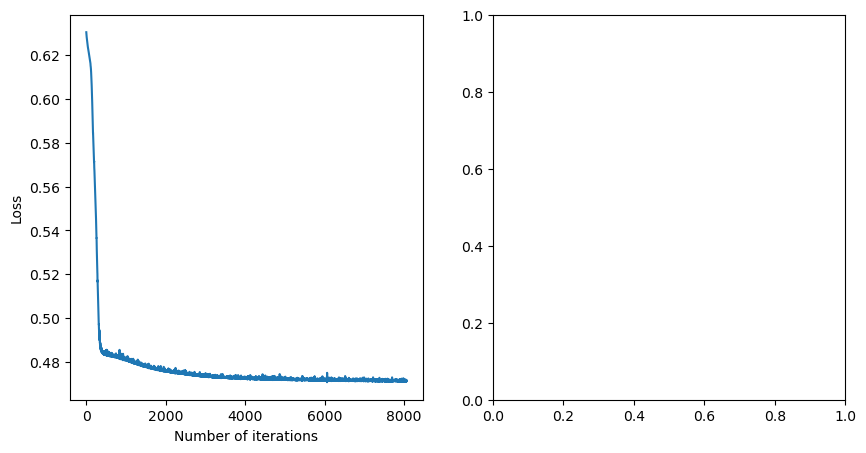

In [12]:
NNC = MLPClassifier(solver='adam', random_state=0, max_iter=100000,n_iter_no_change=2000, verbose=1)
param_grid = {'hidden_layer_sizes': [(16,32,8,4)],
              'learning_rate_init':[1e-3],
              'alpha':[0.1],
              'activation':['relu']}
nn = GridSearchCV(estimator=NNC,
                  param_grid=param_grid,
                  cv=5)
nn.fit(new_data, labels)

nn_model = nn.best_estimator_
print(nn_model)
nn_model.fit(new_data, labels)

score = nn_model.score(new_data, labels)
print("Training: accuracy %0.4f" % (score))
score = nn_model.score(new_test_data, test_labels)
print("Testing: accuracy: %0.4f\n" % (score))

print(nn_model.activation)




fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].plot(nn_model.loss_curve_)
ax[0].set_xlabel('Number of iterations')
ax[0].set_ylabel('Loss')
plt.ylim(0,1)
plt.show()



Training Time:  6.578357934951782


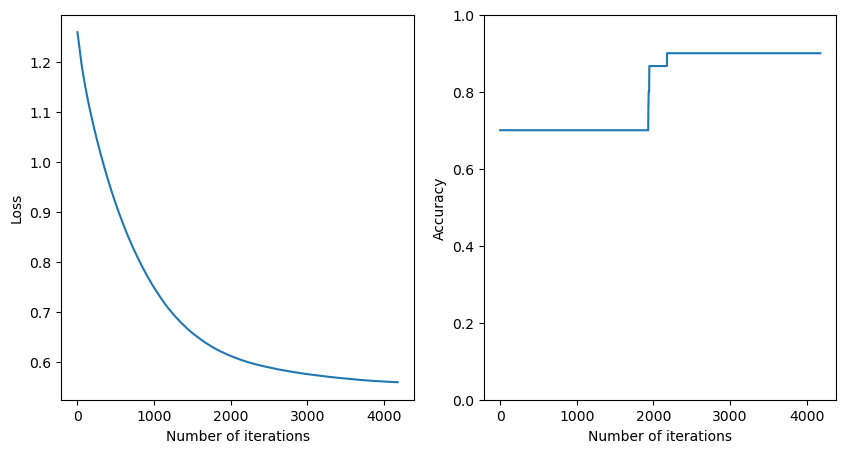

0.9

In [13]:
nn_model = MLPClassifier(solver='adam', hidden_layer_sizes=(16,32,8,4), alpha=4, n_iter_no_change=2000, early_stopping=True, learning_rate_init=0.0001,random_state=0, max_iter=200000)
start = time.time()
nn_model.fit(data, labels)
stop = time.time()
print("Training Time: ", (stop-start))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].plot(nn_model.loss_curve_)
ax[0].set_xlabel('Number of iterations')
ax[0].set_ylabel('Loss')
plt.ylim(0,1)


ax[1].plot(nn_model.validation_scores_)
ax[1].set_xlabel('Number of iterations')
ax[1].set_ylabel('Accuracy')

plt.ylim(0,1)
plt.show()
nn_model.validation_scores_[-1]